# GMM

In [187]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from utils import *
%matplotlib inline

In [2]:
# mysql에서 데이터 호출
final_tb_infra_population = call_dataframe_final("`final_tb_infra_population`")

컬럼명 :  ['NODE_ID', '정류소명', 'X좌표', 'Y좌표', '법정동코드', '법정동_구', '법정동', 'academy_cnt', 'kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt', 'university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt', 'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt', 'alone_ratio', 'emp_corp_ratio', 'population_15to64', 'RIDE_SUM_6_10', 'ALIGHT_SUM_6_10']


In [3]:
final_tb_infra_population.columns

Index(['NODE_ID', '정류소명', 'X좌표', 'Y좌표', '법정동코드', '법정동_구', '법정동', 'academy_cnt',
       'kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt',
       'university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt',
       'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt',
       'alone_ratio', 'emp_corp_ratio', 'population_15to64', 'RIDE_SUM_6_10',
       'ALIGHT_SUM_6_10'],
      dtype='object')

In [101]:
# 승차 타겟
target_df= final_tb_infra_population['RIDE_SUM_6_10']
# 승차 데이터
data_df = final_tb_infra_population[['academy_cnt','kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt','university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt',
       'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt',
       'alone_ratio', 'emp_corp_ratio', 'population_15to64']]
       # ,'RIDE_SUM_6_10']]
bus_on_df = final_tb_infra_population[['academy_cnt','kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt','university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt',
       'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt',
       'alone_ratio', 'emp_corp_ratio', 'population_15to64','RIDE_SUM_6_10']]

In [5]:
data_df

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
0              185                 8         0            1495           0   
1                2                 4         0             199           3   
2               49                 2         1             567           3   
3              166                10         0            1403           1   
4               72                 8         3             596           4   
...            ...               ...       ...             ...         ...   
12543           85                20         0             188           2   
12544           91                22         0             173           2   
12545           23                 7         0              54           5   
12546           23                 7         0              51           5   
12547           14                 8         0              51           3   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  \
0                   0           5        16       406            62   
1                   0           0        26        88            12   
2                   0           1        20       218            32   
3                   0           3        13       356            73   
4                   1           2         4       237            36   
...               ...         ...       ...       ...           ...   
12543               0           0         1        53            23   
12544               0           0         1        51            21   
12545               0           1         0         7            14   
12546               0           1         1         7            14   
12547               0           1         1        11            17   

       culture_cnt  univ_hospital_cnt  public_office_cnt  employee_cnt  \
0               68                  0                 10          4091   
1               19                  0                  1          5952   
2              146                  0                  2          1495   
3               50                  0                  7          4091   
4              145                  0                  4          1495   
...            ...                ...                ...           ...   
12543            0                  0                  2         12523   
12544            0                  0                  2         12523   
12545            0                  0                  1         10704   
12546            0                  0                  1         10704   
12547            0                  0                  1         10704   

       alone_ratio  emp_corp_ratio  population_15to64  
0         0.401961        6.382215                149  
1         0.280998       10.553191               1943  
2         0.278683        4.018817               2336  
3         0.401961        6.382215                149  
4         0.278683        4.018817               2336  
...            ...             ...                ...  
12543     0.059752        3.497068              29747  
12544     0.059752        3.497068              29747  
12545     0.093701        5.314796              18569  
12546     0.093701        5.314796              18569  
12547     0.093701        5.314796              18569  

[12548 rows x 17 columns]

In [6]:
bus_on_df

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
0              185                 8         0            1495           0   
1                2                 4         0             199           3   
2               49                 2         1             567           3   
3              166                10         0            1403           1   
4               72                 8         3             596           4   
...            ...               ...       ...             ...         ...   
12543           85                20         0             188           2   
12544           91                22         0             173           2   
12545           23                 7         0              54           5   
12546           23                 7         0              51           5   
12547           14                 8         0              51           3   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  \
0                   0           5        16       406            62   
1                   0           0        26        88            12   
2                   0           1        20       218            32   
3                   0           3        13       356            73   
4                   1           2         4       237            36   
...               ...         ...       ...       ...           ...   
12543               0           0         1        53            23   
12544               0           0         1        51            21   
12545               0           1         0         7            14   
12546               0           1         1         7            14   
12547               0           1         1        11            17   

       culture_cnt  univ_hospital_cnt  public_office_cnt  employee_cnt  \
0               68                  0                 10          4091   
1               19                  0                  1          5952   
2              146                  0                  2          1495   
3               50                  0                  7          4091   
4              145                  0                  4          1495   
...            ...                ...                ...           ...   
12543            0                  0                  2         12523   
12544            0                  0                  2         12523   
12545            0                  0                  1         10704   
12546            0                  0                  1         10704   
12547            0                  0                  1         10704   

       alone_ratio  emp_corp_ratio  population_15to64  RIDE_SUM_6_10  
0         0.401961        6.382215                149          84743  
1         0.280998       10.553191               1943         387688  
2         0.278683        4.018817               2336         406570  
3         0.401961        6.382215                149          22643  
4         0.278683        4.018817               2336         294069  
...            ...             ...                ...            ...  
12543     0.059752        3.497068              29747           5100  
12544     0.059752        3.497068              29747            307  
12545     0.093701        5.314796              18569           5431  
12546     0.093701        5.314796              18569            640  
12547     0.093701        5.314796              18569           5676  

[12548 rows x 18 columns]

In [7]:
from sklearn.mixture import GaussianMixture

gmm_3 = GaussianMixture(n_components=3, random_state=42).fit(data_df)
gmm_cluster_labels = gmm_3.predict(data_df)

bus_on_df['gmm_cluster'] = gmm_cluster_labels

bus_on_df.head()

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_30065/2413581182.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_on_df['gmm_cluster'] = gmm_cluster_labels


academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
0          185                 8         0            1495           0   
1            2                 4         0             199           3   
2           49                 2         1             567           3   
3          166                10         0            1403           1   
4           72                 8         3             596           4   

   university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  culture_cnt  \
0               0           5        16       406            62           68   
1               0           0        26        88            12           19   
2               0           1        20       218            32          146   
3               0           3        13       356            73           50   
4               1           2         4       237            36          145   

   univ_hospital_cnt  public_office_cnt  employee_cnt  alone_ratio  \
0                  0                 10          4091     0.401961   
1                  0                  1          5952     0.280998   
2                  0                  2          1495     0.278683   
3                  0                  7          4091     0.401961   
4                  0                  4          1495     0.278683   

   emp_corp_ratio  population_15to64  RIDE_SUM_6_10  gmm_cluster  
0        6.382215                149          84743            0  
1       10.553191               1943         387688            0  
2        4.018817               2336         406570            0  
3        6.382215                149          22643            0  
4        4.018817               2336         294069            0

In [8]:
bus_on_df.groupby(['gmm_cluster'])['gmm_cluster'].value_counts().to_frame()

gmm_cluster
gmm_cluster gmm_cluster             
0           0                   9227
1           1                   1218
2           2                   2103

In [9]:
bus_on_df

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
0              185                 8         0            1495           0   
1                2                 4         0             199           3   
2               49                 2         1             567           3   
3              166                10         0            1403           1   
4               72                 8         3             596           4   
...            ...               ...       ...             ...         ...   
12543           85                20         0             188           2   
12544           91                22         0             173           2   
12545           23                 7         0              54           5   
12546           23                 7         0              51           5   
12547           14                 8         0              51           3   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  \
0                   0           5        16       406            62   
1                   0           0        26        88            12   
2                   0           1        20       218            32   
3                   0           3        13       356            73   
4                   1           2         4       237            36   
...               ...         ...       ...       ...           ...   
12543               0           0         1        53            23   
12544               0           0         1        51            21   
12545               0           1         0         7            14   
12546               0           1         1         7            14   
12547               0           1         1        11            17   

       culture_cnt  univ_hospital_cnt  public_office_cnt  employee_cnt  \
0               68                  0                 10          4091   
1               19                  0                  1          5952   
2              146                  0                  2          1495   
3               50                  0                  7          4091   
4              145                  0                  4          1495   
...            ...                ...                ...           ...   
12543            0                  0                  2         12523   
12544            0                  0                  2         12523   
12545            0                  0                  1         10704   
12546            0                  0                  1         10704   
12547            0                  0                  1         10704   

       alone_ratio  emp_corp_ratio  population_15to64  RIDE_SUM_6_10  \
0         0.401961        6.382215                149          84743   
1         0.280998       10.553191               1943         387688   
2         0.278683        4.018817               2336         406570   
3         0.401961        6.382215                149          22643   
4         0.278683        4.018817               2336         294069   
...            ...             ...                ...            ...   
12543     0.059752        3.497068              29747           5100   
12544     0.059752        3.497068              29747            307   
12545     0.093701        5.314796              18569           5431   
12546     0.093701        5.314796              18569            640   
12547     0.093701        5.314796              18569           5676   

       gmm_cluster  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
12543            0  
12544            0  
12545            0  
12546            0  
12547            0  

[12548 rows x 19 columns]

In [10]:
def xy_scale():
    # DF에 좌표 및 node_id 합치기
    좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID']]
    total = pd.concat([bus_on_df,좌표],axis=1)

    # 좌표 스케일링을 위한 형식 변환
    total["X좌표"]=total["X좌표"].astype("float64")
    total["Y좌표"]=total["Y좌표"].astype("float64")

    # 산점도를 위한 좌표 스케일링
    total["X좌표"] = (total["X좌표"]-126)*100
    total["Y좌표"] = (total["Y좌표"]-36)*100
    
    
xy_scale

<function __main__.xy_scale()>

### 다람쥐 버스를 별도의 클래스로 표시하여 주변 정류장의 클래스 확인

In [11]:
# 다람쥐 버스 노선 정류장 뽑기

bus_info_df = call_dataframe('MT_Project_DB.Bus_Route_Info')

# 각 노선이 지나가는 정류장을 노선별로 리스트로 정리하기 
bus_8221_list=bus_info_df[bus_info_df['노선명']=='8221']['NODE_ID'].tolist()
bus_8221_list_str = [str(value) for value in bus_8221_list]

bus_8331_list=map(str,bus_info_df[bus_info_df['노선명']=='8331']['NODE_ID'].tolist())
bus_8331_list_str = [str(value) for value in bus_8331_list]

bus_8441_list=map(str,bus_info_df[bus_info_df['노선명']=='8441']['NODE_ID'].tolist())
bus_8441_list_str = [str(value) for value in bus_8441_list]

bus_8551_list=map(str,bus_info_df[bus_info_df['노선명']=='8551']['NODE_ID'].tolist())
bus_8551_list_str = [str(value) for value in bus_8551_list]

bus_8552_list=map(str,bus_info_df[bus_info_df['노선명']=='8552']['NODE_ID'].tolist())
bus_8552_list_str = [str(value) for value in bus_8552_list]

bus_8761_list=map(str,bus_info_df[bus_info_df['노선명']=='8761']['NODE_ID'].tolist())
bus_8761_list_str = [str(value) for value in bus_8761_list]

bus_8771_list=map(str,bus_info_df[bus_info_df['노선명']=='8771']['NODE_ID'].tolist())
bus_8771_list_str = [str(value) for value in bus_8771_list]

# 버스 노선을 리스트로 만들기 
bus_list =[8221,8331,8441,8551,8552,8761,8771]

# 각 노선이 지나가는 정류장 리스트를 리스트로 묶기
NODE_ID_list=[bus_8221_list_str,bus_8331_list_str,bus_8441_list_str,bus_8551_list_str,bus_8552_list_str,bus_8761_list_str,bus_8771_list_str]


컬럼명 :  ['ROUTE_ID', '노선명', '순번', 'NODE_ID', 'ARS_ID', '정류소명', 'X좌표', 'Y좌표']


In [12]:
NODE_ID_list = np.concatenate(NODE_ID_list).tolist()


# BIC,AIC를 통한 GMM 클러스터 개수 선택
- AIC와 BIC는 낮을수록 좋은 모델이라는 의미

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


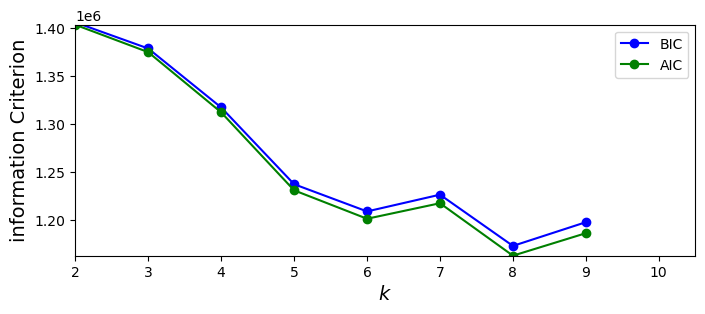

In [13]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(data_df)
             for k in range(2, 10)]
# atrribute_error가 뜨면 범위를 1을 제외하고 입력할 것

bics = [model.bic(data_df) for model in gms_per_k]
aics = [model.aic(data_df) for model in gms_per_k]

plt.figure(figsize = (8,3))
plt.plot(range(2,10),bics, "bo-", label="BIC")
plt.plot(range(2,10),aics, "go-", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("information Criterion", fontsize=14)
plt.axis([2, 10.5, np.min(aics)-50, np.max(aics)+50])
# plt.annotate('Minimum',
#              xy=(7, bics[6]),
#              xytext=(0.35, 0.6),
#              textcoords='figure fraction',
#              fontsize = 14,
#              arrowprops=dict(facecolor = "black", shrink= 0.1)
#              )
plt.legend()

# 그림 저장
# save_fit("aic_bic_vs_k_plot")
plt.show()

In [14]:
# 클러스터 개수와 covariance_type 하이퍼파라미터의 최적 조합을 찾기
min_bic = np.infty

for k in range(2, 20):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(data_df).bic(data_df)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type
print(best_k)
print(best_covariance_type)

19
full


In [15]:
# 클래스 4개
from sklearn.mixture import GaussianMixture

gmm_4 = GaussianMixture(n_components=4, random_state=42).fit(data_df)
gmm_cluster_labels = gmm_4.predict(data_df)

bus_on_df['gmm_cluster'] = gmm_cluster_labels

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_30065/1921411997.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_on_df['gmm_cluster'] = gmm_cluster_labels


In [16]:
# DF에 좌표 및 node_id 합치기
좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID']]
total = pd.concat([bus_on_df,좌표],axis=1)

# 좌표 스케일링을 위한 형식 변환
total["X좌표"]=total["X좌표"].astype("float64")
total["Y좌표"]=total["Y좌표"].astype("float64")

# 산점도를 위한 좌표 스케일링
total["X좌표"] = (total["X좌표"]-126)*100
total["Y좌표"] = (total["Y좌표"]-36)*100

# 다람쥐 버스 클래스 5로 지정
total.loc[total["NODE_ID"].isin(NODE_ID_list),"gmm_cluster"]=5

# 클래스를 기준으로 정렬
total_다람쥐 = total.sort_values(by="gmm_cluster")


/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


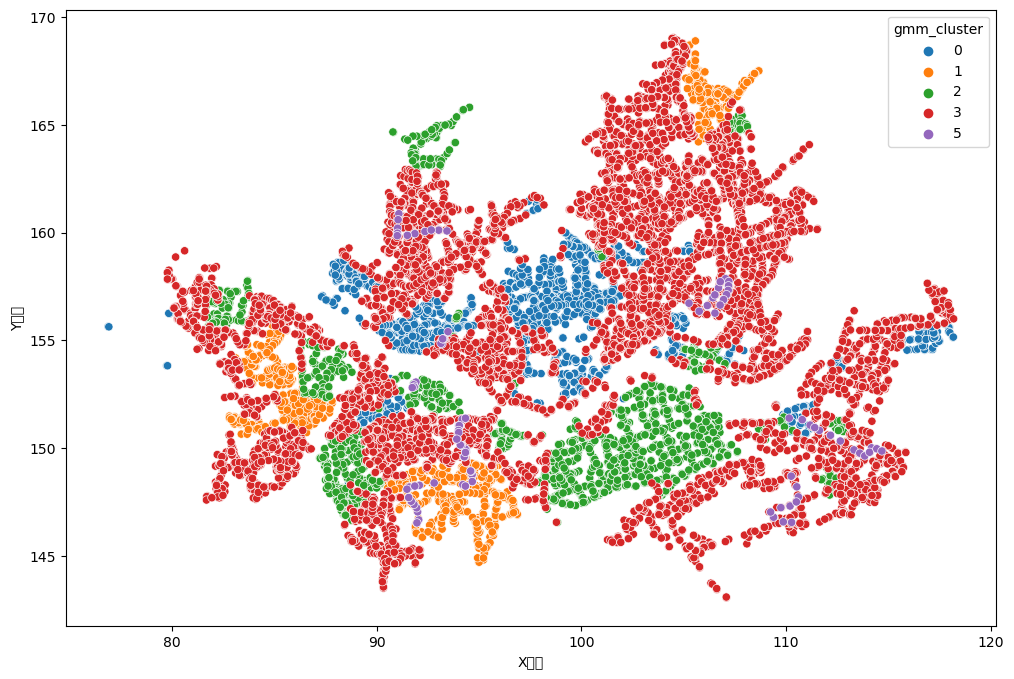

In [17]:

# 좌표를 바탕으로 군집 시각화
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="X좌표",y="Y좌표",hue="gmm_cluster",data=total_다람쥐, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

In [18]:
# GMM 군집화 시각화 함수
def gmm_visualization(class_num,data_df):
    # 클래스 4개
    from sklearn.mixture import GaussianMixture

    gmm = GaussianMixture(n_components=class_num, n_init=10, random_state=42).fit(data_df)
    gmm_cluster_labels = gmm.predict(data_df)

    bus_on_df['gmm_cluster'] = gmm_cluster_labels

    # DF에 좌표 및 node_id 합치기
    좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID']]
    total = pd.concat([bus_on_df,좌표],axis=1)

    # 좌표 스케일링을 위한 형식 변환
    total["X좌표"]=total["X좌표"].astype("float64")
    total["Y좌표"]=total["Y좌표"].astype("float64")

    # 산점도를 위한 좌표 스케일링
    total["X좌표"] = (total["X좌표"]-126)*100
    total["Y좌표"] = (total["Y좌표"]-36)*100

    # 다람쥐 버스 클래스 5로 지정
    total.loc[total["NODE_ID"].isin(NODE_ID_list),"gmm_cluster"]=class_num+2

    # 클래스를 기준으로 정렬
    total_다람쥐 = total.sort_values(by="gmm_cluster")

    # 좌표를 바탕으로 군집 시각화
    import seaborn as sns

    plt.figure(figsize=(12,8))
    
    plt.rcParams['font.family'] = 'AppleGothic'

    sns.scatterplot(x="X좌표",y="Y좌표",hue="gmm_cluster",data=total_다람쥐, palette='tab10')

    plt.show()
    
    print(gmm.converged_)
    print(gmm.n_iter_)


In [19]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12548 entries, 0 to 12547
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   academy_cnt        12548 non-null  int64  
 1   kindergarten_cnt   12548 non-null  int64  
 2   mart_cnt           12548 non-null  int64  
 3   restaurant_cnt     12548 non-null  int64  
 4   school_cnt         12548 non-null  int64  
 5   university_cnt     12548 non-null  int64  
 6   subway_cnt         12548 non-null  int64  
 7   tour_cnt           12548 non-null  int64  
 8   cafe_cnt           12548 non-null  int64  
 9   hospital_cnt       12548 non-null  int64  
 10  culture_cnt        12548 non-null  int64  
 11  univ_hospital_cnt  12548 non-null  int64  
 12  public_office_cnt  12548 non-null  int64  
 13  employee_cnt       12548 non-null  int64  
 14  alone_ratio        12548 non-null  float64
 15  emp_corp_ratio     12548 non-null  float64
 16  population_15to64  125

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_30065/1753214892.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_on_df['gmm_cluster'] = gmm_cluster_labels


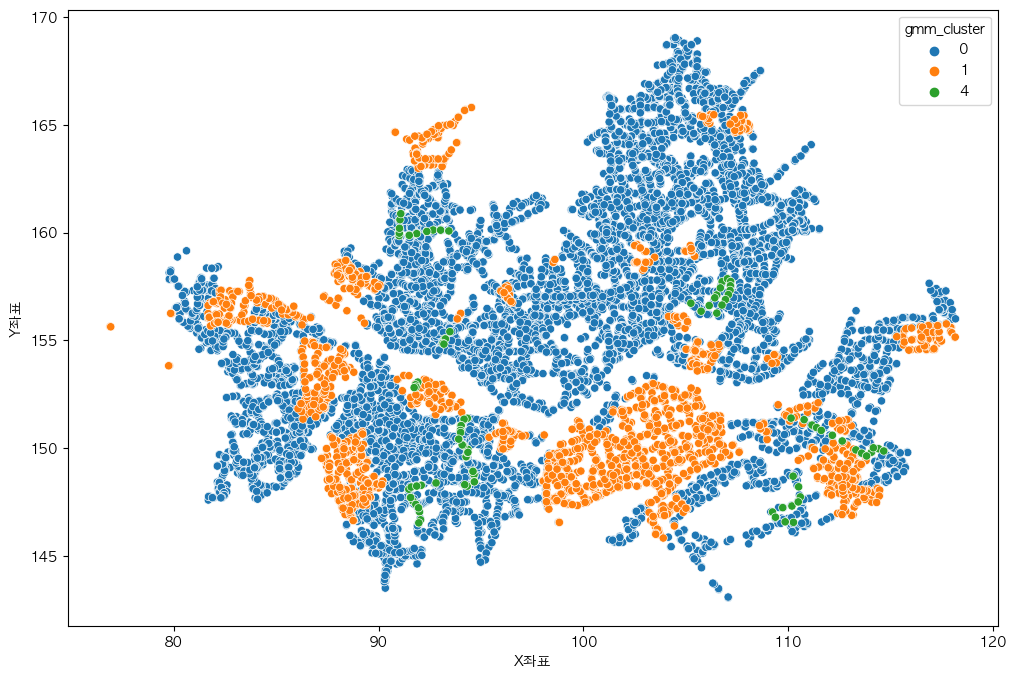

True
13


In [20]:
gmm_visualization(2,data_df)

In [21]:
# Bayesian 군집화 시각화 함수
def bgm_visualization(class_num,data_df):
    # 클래스 4개
    from sklearn.mixture import BayesianGaussianMixture

    bgm = BayesianGaussianMixture(n_components=class_num, n_init=10, random_state=42).fit(data_df)
    bgm_cluster_labels = bgm.predict(data_df)

    bus_on_df['bgm_cluster'] = bgm_cluster_labels

    # DF에 좌표 및 node_id 합치기
    좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID']]
    total = pd.concat([bus_on_df,좌표],axis=1)

    # 좌표 스케일링을 위한 형식 변환
    total["X좌표"]=total["X좌표"].astype("float64")
    total["Y좌표"]=total["Y좌표"].astype("float64")

    # 산점도를 위한 좌표 스케일링
    total["X좌표"] = (total["X좌표"]-126)*100
    total["Y좌표"] = (total["Y좌표"]-36)*100

    # 다람쥐 버스 클래스 지정
    total.loc[total["NODE_ID"].isin(NODE_ID_list),"bgm_cluster"]=class_num+2

    # 클래스를 기준으로 정렬
    total_다람쥐 = total.sort_values(by="bgm_cluster")

    # 좌표를 바탕으로 군집 시각화
    import seaborn as sns

    plt.figure(figsize=(12,8))

    sns.scatterplot(x="X좌표",y="Y좌표",hue="bgm_cluster",data=total_다람쥐, palette='tab20')

    plt.show()
    
    print(np.round(bgm.weights_,2))


/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_30065/168333278.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_on_df['bgm_cluster'] = bgm_cluster_labels


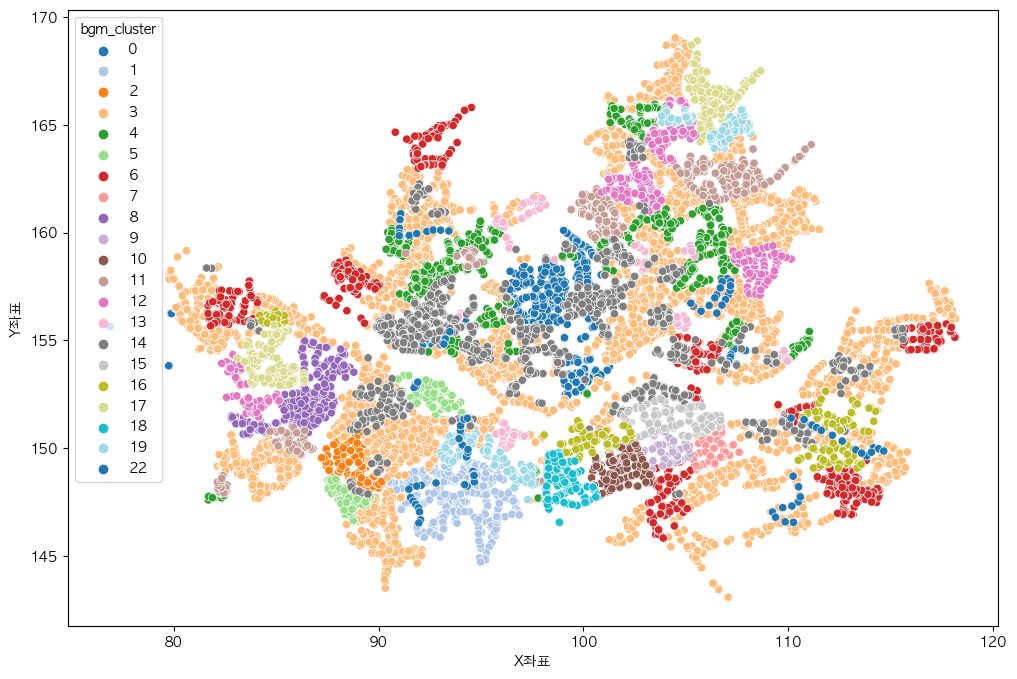

[0.05 0.04 0.01 0.4  0.07 0.02 0.06 0.01 0.03 0.01 0.02 0.04 0.04 0.01
 0.11 0.01 0.02 0.03 0.01 0.02]


In [22]:
bgm_visualization(20,data_df)

### 전체 피처를 클러스터링 해본 결과 다람쥐버스 주변 클래스 구분이 힘든 것을 느낌
- PCA 진행
- 승하차인원수 데이터를 제외한 피쳐 데이터

In [23]:
# For 반복문으로 고윳값과 기여율 확인하기
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

df = pd.DataFrame()

standard_scaler = StandardScaler()
standard_df = standard_scaler.fit_transform(data_df)

minmax_scaler = MinMaxScaler() 
minmax_df = minmax_scaler.fit_transform(data_df) 

robust_scaler = RobustScaler()
robust_df = robust_scaler.fit_transform(data_df)



In [24]:
len(data_df.columns)

17

###  적합한 n_components의 개수 찾기

In [25]:
data_df

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
0              185                 8         0            1495           0   
1                2                 4         0             199           3   
2               49                 2         1             567           3   
3              166                10         0            1403           1   
4               72                 8         3             596           4   
...            ...               ...       ...             ...         ...   
12543           85                20         0             188           2   
12544           91                22         0             173           2   
12545           23                 7         0              54           5   
12546           23                 7         0              51           5   
12547           14                 8         0              51           3   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  \
0                   0           5        16       406            62   
1                   0           0        26        88            12   
2                   0           1        20       218            32   
3                   0           3        13       356            73   
4                   1           2         4       237            36   
...               ...         ...       ...       ...           ...   
12543               0           0         1        53            23   
12544               0           0         1        51            21   
12545               0           1         0         7            14   
12546               0           1         1         7            14   
12547               0           1         1        11            17   

       culture_cnt  univ_hospital_cnt  public_office_cnt  employee_cnt  \
0               68                  0                 10          4091   
1               19                  0                  1          5952   
2              146                  0                  2          1495   
3               50                  0                  7          4091   
4              145                  0                  4          1495   
...            ...                ...                ...           ...   
12543            0                  0                  2         12523   
12544            0                  0                  2         12523   
12545            0                  0                  1         10704   
12546            0                  0                  1         10704   
12547            0                  0                  1         10704   

       alone_ratio  emp_corp_ratio  population_15to64  
0         0.401961        6.382215                149  
1         0.280998       10.553191               1943  
2         0.278683        4.018817               2336  
3         0.401961        6.382215                149  
4         0.278683        4.018817               2336  
...            ...             ...                ...  
12543     0.059752        3.497068              29747  
12544     0.059752        3.497068              29747  
12545     0.093701        5.314796              18569  
12546     0.093701        5.314796              18569  
12547     0.093701        5.314796              18569  

[12548 rows x 17 columns]

In [26]:
# 처음에는 DF의 피처 개수만큼 넣어서 기여율을 확인하다. 그 후의 적합한 component의 개수를 생각
pca = PCA(n_components = 17)
pca_array = pca.fit_transform(data_df)
pca_df = pd.DataFrame(pca_array,columns=[f'pca{num+1}' for num in range(data_df.shape[1])])
pca_df.head()

pca1          pca2         pca3       pca4       pca5       pca6  \
0 -54162.859123  12175.674115  1278.097335   2.239362  71.164762 -72.784249   
1 -51579.091058  12235.498050   -66.633486 -40.523256  27.641024  22.203117   
2 -54433.437896   8790.615303   333.894313 -33.068108  85.975885  35.342115   
3 -54162.885182  12175.517855  1176.354284  -2.691525  35.099096 -70.288891   
4 -54433.423976   8790.668960   368.774994 -12.756420  96.030732  36.898051   

         pca7       pca8       pca9      pca10      pca11     pca12     pca13  \
0   26.187060  -1.089538  -1.878504   4.302975   5.823857  2.852756 -0.252073   
1    7.417086  -3.816868   1.891822  18.023523  11.397612  9.563049 -0.640042   
2  113.291839   9.075979 -12.733683   2.317064   6.412619  5.851136  0.680822   
3   15.961721  -1.172933  -3.415428   4.632277   4.138676  2.348013 -1.155369   
4  108.039770  14.796973 -13.407671  -7.344022  -2.680805 -2.919230  2.393399   

      pca14     pca15     pca16     pca17  
0  2.423169  0.079127 -0.025553  0.013993  
1 -1.326788 -0.015225 -0.155292  0.084383  
2  0.142894 -0.259185  0.174556  0.000116  
3  0.661143  0.097933 -0.055013  0.060284  
4  1.007088  0.664624  0.143720  0.029750

In [27]:
# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
                       '기여율':pca.explained_variance_ratio_},
                      index=np.array([f'pca{num+1}' for num in range(data_df.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

설명가능한 분산 비율(고윳값)           기여율     누적기여율
pca1       2.423595e+09  6.656463e-01  0.665646
pca2       1.217310e+09  3.343373e-01  0.999984
pca3       5.533029e+04  1.519660e-05  0.999999
pca4       3.049187e+03  8.374665e-07  1.000000
pca5       9.012242e+02  2.475234e-07  1.000000
pca6       5.697755e+02  1.564902e-07  1.000000
pca7       8.016237e+01  2.201679e-08  1.000000
pca8       3.847975e+01  1.056856e-08  1.000000
pca9       7.395039e+00  2.031065e-09  1.000000
pca10      3.535350e+00  9.709923e-10  1.000000
pca11      3.118628e+00  8.565388e-10  1.000000
pca12      2.807391e+00  7.710567e-10  1.000000
pca13      8.467356e-01  2.325580e-10  1.000000
pca14      5.929535e-01  1.628561e-10  1.000000
pca15      2.993035e-01  8.220442e-11  1.000000
pca16      5.800597e-02  1.593148e-11  1.000000
pca17      3.880604e-03  1.065817e-12  1.000000

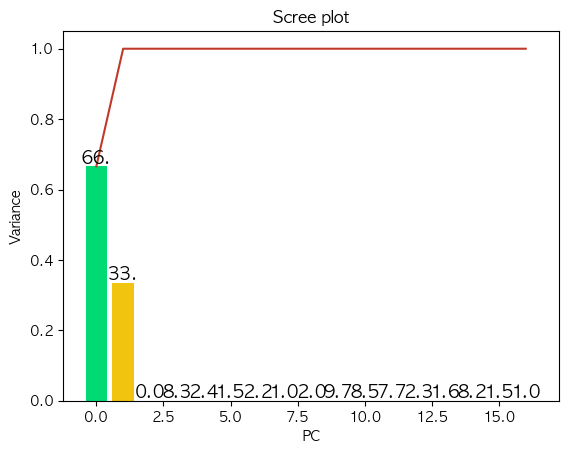

In [28]:
# scree plot

def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_ 
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components): #라벨링(바 위에 텍스트(annotation) 쓰기)
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    
scree_plot(pca)

# 누적이 0.8이상인 부분까지

### PCA 진행

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


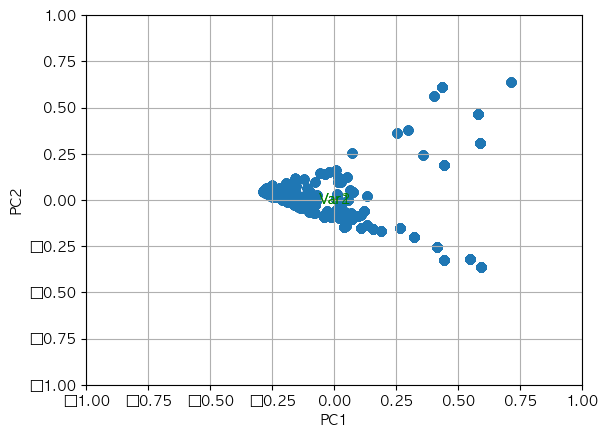

In [29]:
# 4차원 데이터를 2차원으로 축소
# n_components : 축소할 차원. 주성분 개수. 분산이 가장 큰 벡터의 개수
# from pca import pca # biplot을 그리기 위한 별도 라이브러리

pca_2 = PCA(n_components=2)
pca_array = pca_2.fit_transform(data_df)
pca_2_df = pd.DataFrame(pca_array,
                      columns=['pca1','pca2'])
pca_2_df.head()

# Biplot 시각화 
def biplot(score,coeff,pcax,pcay,labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n=score.shape[1]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()
  
biplot(pca_array, pca_2.components_, 1, 2)

In [30]:
pca_1 = pca_2_df[['pca1']]
pca_1 = pca_1.sort_values(by='pca1', ascending=False)
pca_1 = pca_1.reset_index()
pca_1.index = pca_1.index+1
pca_1.index.name = "Ranking"
pca_1 = pca_1.rename(columns={'index':"station_name"})
pca_1

station_name           pca1
Ranking                             
1               11368  138899.903368
2               11153  138899.892284
3               11479  138899.886920
4               11156  138899.883767
5               11367  138899.866950
...               ...            ...
12544             390  -56502.776665
12545             290  -56502.779133
12546             384  -56502.779890
12547             433  -56502.783651
12548             300  -56502.785266

[12548 rows x 2 columns]

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


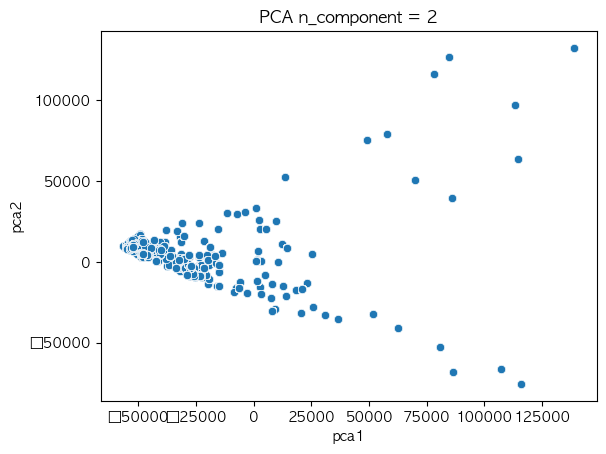

In [31]:
# 2차원 시각화
plt.rcParams['font.family'] = 'AppleGothic'

sns.scatterplot(
    x="pca1",
    y="pca2",
    palette='muted',
    data= pca_2_df
)

plt.title("PCA n_component = 2")
plt.show()

# PCA df를 바탕으로 클러스터링 진행

In [32]:
pca_2_df

pca1          pca2
0     -54162.859123  12175.674115
1     -51579.091058  12235.498050
2     -54433.437896   8790.615303
3     -54162.885182  12175.517855
4     -54433.423976   8790.668960
...             ...           ...
12543 -27188.677394  -2642.327515
12544 -27188.680330  -2642.349322
12545 -36415.868161   3923.753871
12546 -36415.869008   3923.749724
12547 -36415.870878   3923.751615

[12548 rows x 2 columns]

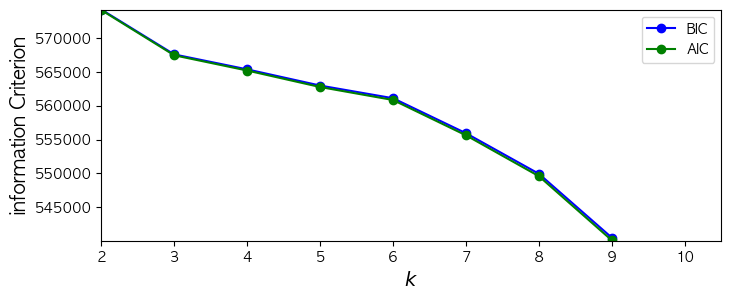

In [33]:
# component 개수 찾기
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(pca_2_df)
             for k in range(2, 10)]
# atrribute_error가 뜨면 범위를 1을 제외하고 입력할 것

bics = [model.bic(pca_2_df) for model in gms_per_k]
aics = [model.aic(pca_2_df) for model in gms_per_k]

plt.figure(figsize = (8,3))
plt.plot(range(2,10),bics, "bo-", label="BIC")
plt.plot(range(2,10),aics, "go-", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("information Criterion", fontsize=14)
plt.axis([2, 10.5, np.min(aics)-50, np.max(aics)+50])
# plt.annotate('Minimum',
#              xy=(7, bics[6]),
#              xytext=(0.35, 0.6),
#              textcoords='figure fraction',
#              fontsize = 14,
#              arrowprops=dict(facecolor = "black", shrink= 0.1)
#              )
plt.legend()

# 그림 저장
# save_fit("aic_bic_vs_k_plot")
plt.show()

In [34]:
# 클래스 9개
from sklearn.mixture import GaussianMixture

gmm_9 = GaussianMixture(n_components=9, random_state=42).fit(pca_2_df)
gmm_cluster_labels = gmm_9.predict(pca_2_df)

data_df['gmm_cluster'] = gmm_cluster_labels
pca_2_df['gmm_cluster'] = gmm_cluster_labels

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_30065/564750316.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['gmm_cluster'] = gmm_cluster_labels


In [35]:
data_df

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
0              185                 8         0            1495           0   
1                2                 4         0             199           3   
2               49                 2         1             567           3   
3              166                10         0            1403           1   
4               72                 8         3             596           4   
...            ...               ...       ...             ...         ...   
12543           85                20         0             188           2   
12544           91                22         0             173           2   
12545           23                 7         0              54           5   
12546           23                 7         0              51           5   
12547           14                 8         0              51           3   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  \
0                   0           5        16       406            62   
1                   0           0        26        88            12   
2                   0           1        20       218            32   
3                   0           3        13       356            73   
4                   1           2         4       237            36   
...               ...         ...       ...       ...           ...   
12543               0           0         1        53            23   
12544               0           0         1        51            21   
12545               0           1         0         7            14   
12546               0           1         1         7            14   
12547               0           1         1        11            17   

       culture_cnt  univ_hospital_cnt  public_office_cnt  employee_cnt  \
0               68                  0                 10          4091   
1               19                  0                  1          5952   
2              146                  0                  2          1495   
3               50                  0                  7          4091   
4              145                  0                  4          1495   
...            ...                ...                ...           ...   
12543            0                  0                  2         12523   
12544            0                  0                  2         12523   
12545            0                  0                  1         10704   
12546            0                  0                  1         10704   
12547            0                  0                  1         10704   

       alone_ratio  emp_corp_ratio  population_15to64  gmm_cluster  
0         0.401961        6.382215                149            6  
1         0.280998       10.553191               1943            6  
2         0.278683        4.018817               2336            6  
3         0.401961        6.382215                149            6  
4         0.278683        4.018817               2336            6  
...            ...             ...                ...          ...  
12543     0.059752        3.497068              29747            0  
12544     0.059752        3.497068              29747            0  
12545     0.093701        5.314796              18569            0  
12546     0.093701        5.314796              18569            0  
12547     0.093701        5.314796              18569            0  

[12548 rows x 18 columns]

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


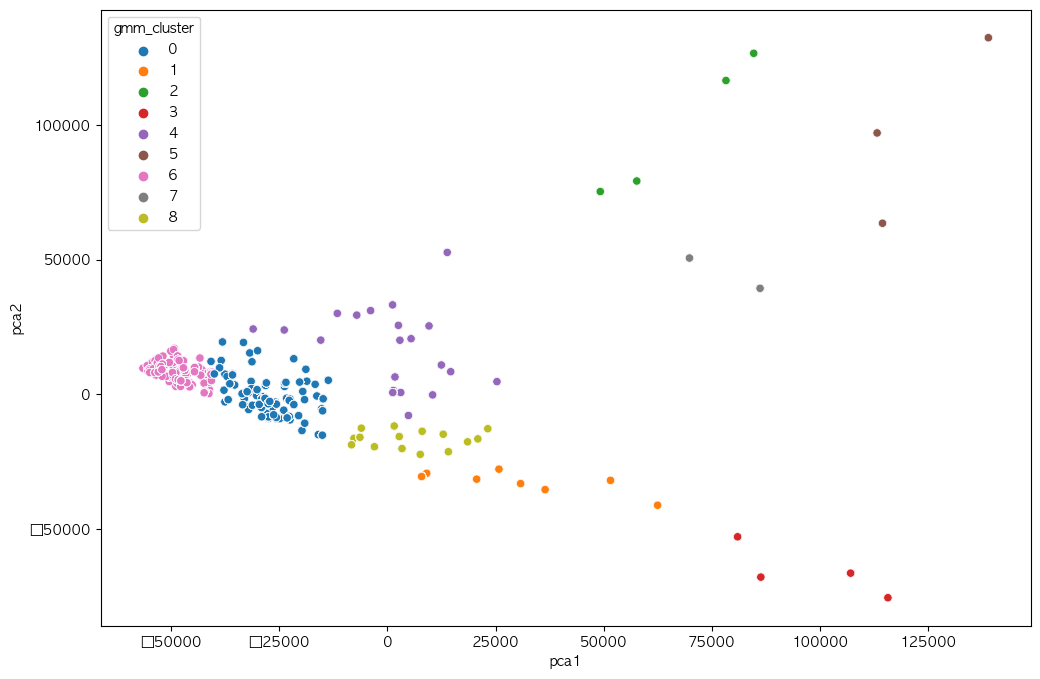

In [36]:
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="pca1",y="pca2",hue="gmm_cluster",data=pca_2_df, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

In [37]:
좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID']]
total = pd.concat([data_df,좌표],axis=1)

 # 좌표 스케일링을 위한 형식 변환
total["X좌표"]=total["X좌표"].astype("float64")
total["Y좌표"]=total["Y좌표"].astype("float64")
    
total["X좌표"]=(total["X좌표"]-126)*100
total["Y좌표"]=(total["Y좌표"]-36)*100

# total.loc[total["NODE_ID"].isin(NODE_ID_list),"gmm_cluster"]=11+2

# 클래스를 기준으로 정렬
total_다람쥐 = total.sort_values(by="gmm_cluster")

total

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
0              185                 8         0            1495           0   
1                2                 4         0             199           3   
2               49                 2         1             567           3   
3              166                10         0            1403           1   
4               72                 8         3             596           4   
...            ...               ...       ...             ...         ...   
12543           85                20         0             188           2   
12544           91                22         0             173           2   
12545           23                 7         0              54           5   
12546           23                 7         0              51           5   
12547           14                 8         0              51           3   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  ...  \
0                   0           5        16       406            62  ...   
1                   0           0        26        88            12  ...   
2                   0           1        20       218            32  ...   
3                   0           3        13       356            73  ...   
4                   1           2         4       237            36  ...   
...               ...         ...       ...       ...           ...  ...   
12543               0           0         1        53            23  ...   
12544               0           0         1        51            21  ...   
12545               0           1         0         7            14  ...   
12546               0           1         1         7            14  ...   
12547               0           1         1        11            17  ...   

       univ_hospital_cnt  public_office_cnt  employee_cnt  alone_ratio  \
0                      0                 10          4091     0.401961   
1                      0                  1          5952     0.280998   
2                      0                  2          1495     0.278683   
3                      0                  7          4091     0.401961   
4                      0                  4          1495     0.278683   
...                  ...                ...           ...          ...   
12543                  0                  2         12523     0.059752   
12544                  0                  2         12523     0.059752   
12545                  0                  1         10704     0.093701   
12546                  0                  1         10704     0.093701   
12547                  0                  1         10704     0.093701   

       emp_corp_ratio  population_15to64  gmm_cluster        X좌표         Y좌표  \
0            6.382215                149            6   98.77499  156.976513   
1           10.553191               1943            6   99.65660  157.918302   
2            4.018817               2336            6   99.83401  158.267117   
3            6.382215                149            6   98.76131  156.857927   
4            4.018817               2336            6  100.17440  158.624300   
...               ...                ...          ...        ...         ...   
12543        3.497068              29747            0  114.85400  154.630481   
12544        3.497068              29747            0  114.88322  154.628161   
12545        5.314796              18569            0  114.44790  152.674338   
12546        5.314796              18569            0  114.44012  152.658385   
12547        5.314796              18569            0  114.75394  152.791119   

         NODE_ID  
0      100000001  
1      100000002  
2      100000003  
3      100000004  
4      100000005  
...          ...  
12543  124900133  
12544  124900134  
12545  124900135  
12546  124900136  
12547  124900137  

[12548 rows x 21 columns]

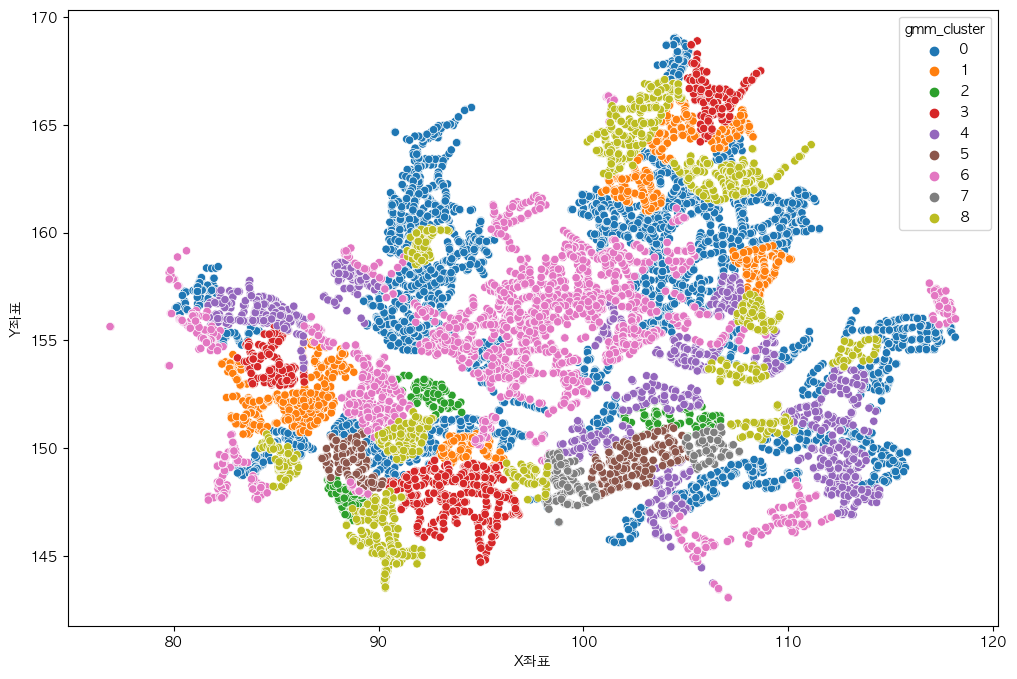

In [38]:
# 좌표를 바탕으로 군집 시각화
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="X좌표",y="Y좌표",hue="gmm_cluster",data=total_다람쥐, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

In [39]:
# 다람쥐 버스 군집 확인
start_station = ["111000128","113000113","120000156","120000109","105000127","122000305","123000209"]
end_station = ["111000291","113000111", "120000007","120000018","105000072","122000302","123000043"]
다람쥐_start_class = []
for i in start_station:
    다람쥐_start_class.append(total_다람쥐.loc[total_다람쥐["NODE_ID"]==i,"gmm_cluster"].values[0])
    
다람쥐_end_class = []
for j in end_station:
    다람쥐_end_class.append(total_다람쥐.loc[total_다람쥐["NODE_ID"]==j,"gmm_cluster"].values[0])

print(set(다람쥐_start_class))
print(set(다람쥐_end_class))

{0, 3, 4, 6}
{0, 3, 4, 6, 8}


## 승하차 인원 피처를 넣은 데이터로 pca 진행

In [40]:
final_tb_infra_population.columns

Index(['NODE_ID', '정류소명', 'X좌표', 'Y좌표', '법정동코드', '법정동_구', '법정동', 'academy_cnt',
       'kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt',
       'university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt',
       'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt',
       'alone_ratio', 'emp_corp_ratio', 'population_15to64', 'RIDE_SUM_6_10',
       'ALIGHT_SUM_6_10'],
      dtype='object')

In [41]:
# 승차인원 피처를 넣은 데이터
data_df_on = final_tb_infra_population[['academy_cnt','kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt','university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt',
       'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt',
       'alone_ratio', 'emp_corp_ratio', 'population_15to64','RIDE_SUM_6_10']]

In [42]:
# 처음에는 DF의 피처 개수만큼 넣어서 기여율을 확인하다. 그 후의 적합한 component의 개수를 생각
pca = PCA(n_components = 18)
pca_array = pca.fit_transform(data_df_on)
pca_df = pd.DataFrame(pca_array,columns=[f'pca{num+1}' for num in range(data_df_on.shape[1])])
pca_df.head()

pca1          pca2          pca3         pca4       pca5  \
0   20572.888701 -55163.783277  12192.097707  1268.057913   3.251236   
1  323316.780884 -66484.401303  12391.208049  -181.364518 -47.127355   
2  342049.609108 -70202.673967   8955.329873   212.592078 -39.492016   
3  -41461.717472 -52314.116659  12163.332440  1187.739395  -0.640807   
4  229667.153687 -65040.139417   8903.555392   286.368905 -16.888073   

         pca6       pca7        pca8       pca9      pca10      pca11  \
0   69.829123 -72.833763   26.210397  -1.069893  -1.872960   4.290791   
1   37.532975  20.858750    6.830135  -4.093758   1.823494  18.118661   
2   95.875860  33.836552  112.676739   8.816809 -12.803083   2.419675   
3   32.132578 -70.027664   16.100212  -1.101588  -3.396135   4.599121   
4  102.570543  35.798982  107.614444  14.626824 -13.456464  -7.259992   

       pca12     pca13     pca14     pca15     pca16     pca17     pca18  
0   5.824882  2.848806 -0.252005  2.423989  0.076533 -0.025531  0.014344  
1  11.389224  9.817608 -0.670656 -1.362313  0.045731 -0.155881  0.074763  
2   6.405511  6.068241  0.652250  0.110187 -0.203216  0.174013 -0.008788  
3   4.141187  2.304763 -1.149679  0.667752  0.085922 -0.054896  0.062208  
4  -2.687052 -2.792344  2.376433  0.988314  0.697775  0.143385  0.024281

In [43]:
# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
                       '기여율':pca.explained_variance_ratio_},
                      index=np.array([f'pca{num+1}' for num in range(data_df_on.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

설명가능한 분산 비율(고윳값)           기여율     누적기여율
pca1       8.513978e+09  7.011955e-01  0.701195
pca2       2.410743e+09  1.985443e-01  0.899740
pca3       1.217309e+09  1.002553e-01  0.999995
pca4       5.431737e+04  4.473478e-06  1.000000
pca5       3.045908e+03  2.508553e-07  1.000000
pca6       8.942293e+02  7.364707e-08  1.000000
pca7       5.696611e+02  4.691623e-08  1.000000
pca8       8.013821e+01  6.600035e-09  1.000000
pca9       3.847426e+01  3.168669e-09  1.000000
pca10      7.394663e+00  6.090108e-10  1.000000
pca11      3.534393e+00  2.910861e-10  1.000000
pca12      3.118622e+00  2.568439e-10  1.000000
pca13      2.804109e+00  2.309412e-10  1.000000
pca14      8.466828e-01  6.973123e-11  1.000000
pca15      5.928828e-01  4.882873e-11  1.000000
pca16      2.990938e-01  2.463281e-11  1.000000
pca17      5.800595e-02  4.777263e-12  1.000000
pca18      3.875234e-03  3.191571e-13  1.000000

In [44]:
# n_components : 축소할 차원. 주성분 개수. 분산이 가장 큰 벡터의 개수

pca_2 = PCA(n_components=2)
pca_array = pca_2.fit_transform(data_df_on)
pca_2_df = pd.DataFrame(pca_array,
                      columns=['pca1','pca2'])
pca_2_df.head()

pca1          pca2
0   20572.888701 -55163.783277
1  323316.780884 -66484.401303
2  342049.609108 -70202.673967
3  -41461.717472 -52314.116659
4  229667.153687 -65040.139417

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


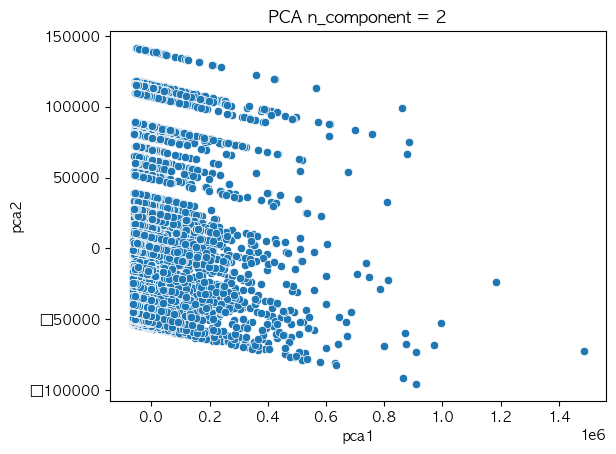

In [45]:
# 2차원 시각화
plt.rcParams['font.family'] = 'AppleGothic'

sns.scatterplot(
    x="pca1",
    y="pca2",
    palette='muted',
    data= pca_2_df
)

plt.title("PCA n_component = 2")
plt.show()

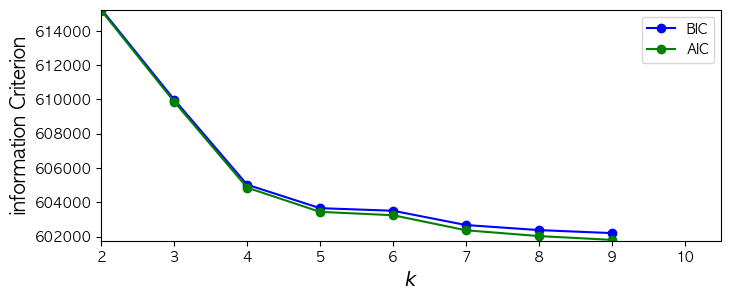

In [46]:
# component 개수 찾기
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(pca_2_df)
             for k in range(2, 10)]
# atrribute_error가 뜨면 범위를 1을 제외하고 입력할 것

bics = [model.bic(pca_2_df) for model in gms_per_k]
aics = [model.aic(pca_2_df) for model in gms_per_k]

plt.figure(figsize = (8,3))
plt.plot(range(2,10),bics, "bo-", label="BIC")
plt.plot(range(2,10),aics, "go-", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("information Criterion", fontsize=14)
plt.axis([2, 10.5, np.min(aics)-50, np.max(aics)+50])
# plt.annotate('Minimum',
#              xy=(7, bics[6]),
#              xytext=(0.35, 0.6),
#              textcoords='figure fraction',
#              fontsize = 14,
#              arrowprops=dict(facecolor = "black", shrink= 0.1)
#              )
plt.legend()

# 그림 저장
# save_fit("aic_bic_vs_k_plot")
plt.show()

In [47]:
# 클래스 8개
from sklearn.mixture import GaussianMixture

gmm_9 = GaussianMixture(n_components=8, random_state=42).fit(pca_2_df)
gmm_cluster_labels = gmm_9.predict(pca_2_df)

bus_on_df['gmm_cluster'] = gmm_cluster_labels
pca_2_df['gmm_cluster'] = gmm_cluster_labels

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_30065/1721233341.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_on_df['gmm_cluster'] = gmm_cluster_labels


/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


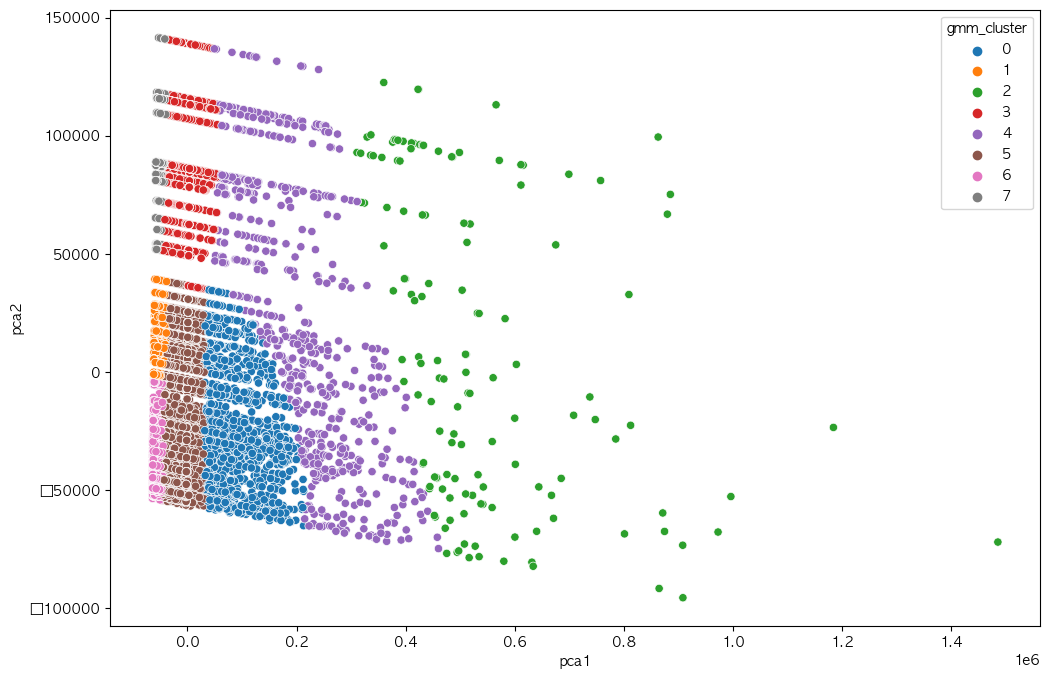

In [48]:
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="pca1",y="pca2",hue="gmm_cluster",data=pca_2_df, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

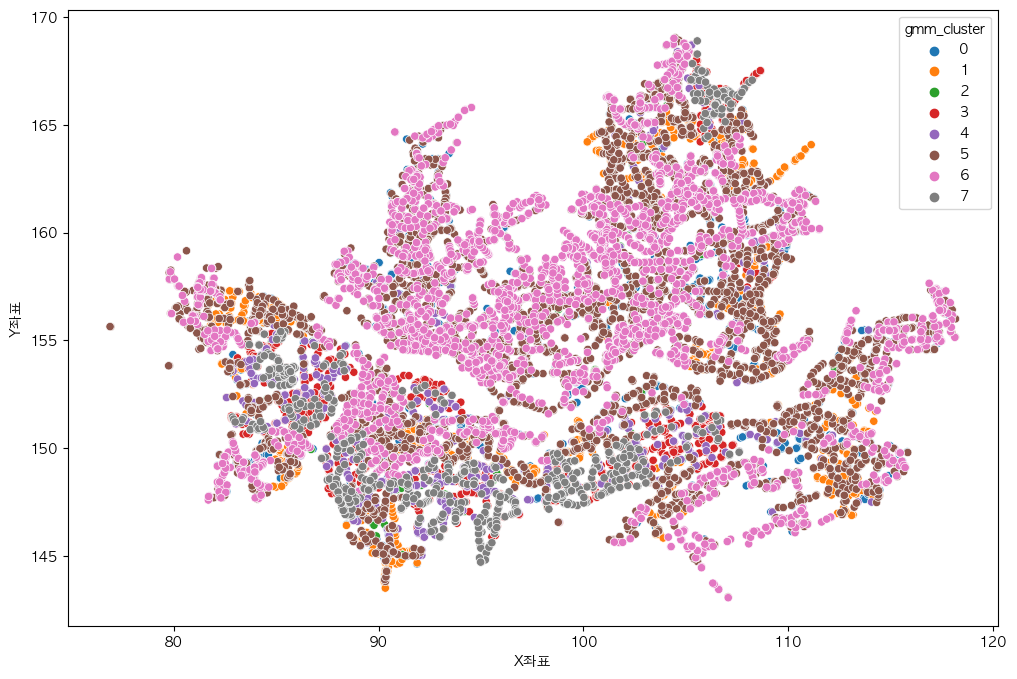

In [49]:
좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID',"정류소명"]]
total = pd.concat([bus_on_df,좌표],axis=1)

 # 좌표 스케일링을 위한 형식 변환
total["X좌표"]=total["X좌표"].astype("float64")
total["Y좌표"]=total["Y좌표"].astype("float64")
    
total["X좌표"]=(total["X좌표"]-126)*100
total["Y좌표"]=(total["Y좌표"]-36)*100

# total.loc[total["NODE_ID"].isin(NODE_ID_list),"gmm_cluster"]=11+2

# 클래스를 기준으로 정렬
total_on_다람쥐 = total.sort_values(by="gmm_cluster")

# 좌표를 바탕으로 군집 시각화
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="X좌표",y="Y좌표",hue="gmm_cluster",data=total_on_다람쥐, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

In [50]:
# 다람쥐 버스 군집 확인
start_on_station = ["111000128","113000113","120000156","120000109","105000127","122000305","123000209"]
end_on_station = ["111000291","113000111", "120000007","120000018","105000072","122000302","123000043"]
다람쥐_start_on_class = []
for i in start_on_station:
    다람쥐_start_on_class.append(total_on_다람쥐.loc[total_on_다람쥐["NODE_ID"]==i,"gmm_cluster"].values[0])
    
다람쥐_end_on_class = []
for j in end_on_station:
    다람쥐_end_on_class.append(total_on_다람쥐.loc[total_on_다람쥐["NODE_ID"]==j,"gmm_cluster"].values[0])

print(set(다람쥐_start_on_class))
print(set(다람쥐_end_on_class))

{0, 3, 4}
{0, 4, 5}


In [51]:
total_on_다람쥐.loc[total_on_다람쥐["gmm_cluster"]==3,:]

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
7667            38                15         1             247           4   
7448            57                26         0              40           2   
7669            43                14         1             296           6   
11160          214                 4         3             858           1   
8519            16                10         0             133           1   
...            ...               ...       ...             ...         ...   
7884            35                12         1             170           3   
6784            27                13         0              17           4   
8138            23                16         0              29           1   
6724             0                 1         0               3           0   
7777            47                25         0             596           2   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  ...  \
7667                0           0         0        57            23  ...   
7448                2           0         2        11             5  ...   
7669                0           1         0        57            25  ...   
11160               0           0         0       203            99  ...   
8519                0           1         1        45             7  ...   
...               ...         ...       ...       ...           ...  ...   
7884                0           1         0        32            11  ...   
6784                0           0         2         3             7  ...   
8138                0           0         2         8             6  ...   
6724                0           0         2         0             0  ...   
7777                0           1         1        71            24  ...   

       alone_ratio  emp_corp_ratio  population_15to64  RIDE_SUM_6_10  \
7667      0.189881        5.434933              83913          62698   
7448      0.154782        2.906353             156328          67610   
7669      0.189881        5.434933              83913          69576   
11160     0.263555        7.381010              52862          40028   
8519      0.452023        7.502725              18369          61645   
...            ...             ...                ...            ...   
7884      0.258852        3.828980             170048          61645   
6784      0.086301        3.902886             120593          61645   
8138      0.189881        5.434933              83913          29971   
6724      0.086301        3.902886             120593          46350   
7777      0.189881        5.434933              83913          21537   

       gmm_cluster  bgm_cluster        X좌표         Y좌표    NODE_ID  \
7667             3            2   89.12183  149.967518  116000022   
7448             3           17   85.03920  154.177762  115900084   
7669             3            2   89.18138  149.693638  116000024   
11160            3            9  103.40024  149.408367  122000188   
8519             3            5   88.78422  146.648253  117900085   
...            ...          ...        ...         ...        ...   
7884             3            1   93.23893  149.165792  116000566   
6784             3            8   85.04466  151.159813  114000287   
8138             3            2   87.57444  148.982889  116900183   
6724             3            8   83.57222  150.669905  114000218   
7777             3            2   88.69823  148.491293  116000153   

                   정류소명  
7667      구로도서관.대성스카이렉스  
7448     강서구립봉제산어르신복지센터  
7669              영림중학교  
11160            역삼초등학교  
8519                독산역  
...                 ...  
7884       당곡중학교공영주차장입구  
6784               정랑고개  
8138            구일우성아파트  
6724   신정숲속마을아파트.댓골마을입구  
7777               남구로역  

[1209 rows x 24 columns]

In [52]:
total_on_다람쥐.loc[total_on_다람쥐["gmm_cluster"]==4,:]

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
4392          115                26         3             198           6   
4376           38                15         0             119           2   
8580           27                13         0             143           1   
6547          116                12         3             153           2   
4388           91                22         1             170           5   
...           ...               ...       ...             ...         ...   
9534           79                21         1             238           1   
3419           69                21         1             274           4   
3414           88                21         1             278           4   
3416           83                19         1             178           6   
6636           67                21         0             263           2   

      university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  ...  \
4392               1           0         1        31            83  ...   
4376               1           1         0        23            11  ...   
8580               0           1         1        44             8  ...   
6547               0           0         1        38            11  ...   
4388               1           0         0        37            19  ...   
...              ...         ...       ...       ...           ...  ...   
9534               0           1         0        75            39  ...   
3419               0           1         0        39            43  ...   
3414               0           1         0        43            44  ...   
3416               0           0         0        32            25  ...   
6636               0           0         0        44            44  ...   

      alone_ratio  emp_corp_ratio  population_15to64  RIDE_SUM_6_10  \
4392     0.106446        3.660151             141982         123421   
4376     0.106446        3.660151             141982         125602   
8580     0.199355        3.926672              72701         255804   
6547     0.079399        4.072888             106358         146247   
4388     0.106446        3.660151             141982         173263   
...           ...             ...                ...            ...   
9534     0.197213        3.683373              16458         289020   
3419     0.146111        3.084936              92430         206353   
3414     0.146111        3.084936              92430         275513   
3416     0.146111        3.084936              92430         219624   
6636     0.115002        3.299534              85093         337827   

      gmm_cluster  bgm_cluster        X좌표         Y좌표    NODE_ID  \
4392            4           17  106.16198  164.963724  110000145   
4376            4           17  107.77874  166.614806  110000127   
8580            4            3   88.98144  146.605005  117900148   
6547            4            8   87.18511  153.268917  114000009   
4388            4           17  106.66569  166.444373  110000139   
...           ...          ...        ...         ...        ...   
9534            4            3   94.89458  150.357996  119900108   
3419            4           12  102.19030  161.907668  108000083   
3414            4           12  102.13080  161.808830  108000078   
3416            4           12  102.21104  161.545969  108000080   
6636            4           12   84.18635  151.782796  114000115   

                정류소명  
4392         상계주공2단지  
4376         동아불암아파트  
8580             독산역  
6547      목동3.4단지사잇길  
4388       상계한신2차아파트  
...              ...  
9534             상도역  
3419          삼양동사거리  
3414          삼양동사거리  
3416  송천초등학교.미아뉴타운입구  
6636       신한은행신월동지점  

[655 rows x 24 columns]

#### 하차인원

In [53]:
# 하차인원 피처를 넣은 데이터
data_df_off = final_tb_infra_population[['academy_cnt','kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt','university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt',
       'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt',
       'alone_ratio', 'emp_corp_ratio', 'population_15to64','ALIGHT_SUM_6_10']]

In [54]:
# 처음에는 DF의 피처 개수만큼 넣어서 기여율을 확인하다. 그 후의 적합한 component의 개수를 생각
pca = PCA(n_components = 18)
pca_array = pca.fit_transform(data_df_off)
pca_df = pd.DataFrame(pca_array,columns=[f'pca{num+1}' for num in range(data_df_off.shape[1])])
pca_df.head()

pca1          pca2          pca3         pca4       pca5  \
0   -9132.918421 -53986.221554 -12013.806682  1279.882987  -0.894907   
1  650739.637298 -71362.560904   3099.847290  -397.442645 -28.560823   
2  511208.237976 -69975.948113   3353.083360    72.888846 -24.634588   
3   59214.653411 -56053.734512 -10440.169619  1143.583044  -4.274905   
4  341072.161641 -64829.368852   -563.824828   193.605321  -7.506517   

         pca6       pca7        pca8       pca9      pca10      pca11  \
0   67.590482 -72.759150   26.606198  -1.642660  -1.839218   4.422908   
1   42.679014  22.021659    5.236219  -1.474017   1.712381  17.721000   
2   96.885274  35.194931  111.693733  10.465652 -12.852499   2.091915   
3   33.338115 -70.276770   16.161567  -1.450988  -3.396206   4.701916   
4  103.009510  36.794553  107.006743  15.609143 -13.485303  -7.564595   

       pca12      pca13     pca14     pca15     pca16     pca17     pca18  
0   5.808425   2.688676 -0.217856  2.466494  0.067096 -0.016946  0.014215  
1  11.396893  10.022702 -0.852623 -1.539552  0.032850 -0.192050  0.083423  
2   6.422766   6.274605  0.518772 -0.007666 -0.225645  0.148607 -0.000558  
3   4.127212   2.243462 -1.135590  0.677782  0.092938 -0.051222  0.060382  
4  -2.654641  -2.563479  2.288504  0.923127  0.683948  0.128029  0.029341

In [55]:
# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
                       '기여율':pca.explained_variance_ratio_},
                      index=np.array([f'pca{num+1}' for num in range(data_df_off.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

설명가능한 분산 비율(고윳값)           기여율     누적기여율
pca1       1.321250e+10  7.847187e-01  0.784719
pca2       2.413676e+09  1.433534e-01  0.928072
pca3       1.211011e+09  7.192454e-02  0.999997
pca4       5.200853e+04  3.088899e-06  1.000000
pca5       3.045168e+03  1.808591e-07  1.000000
pca6       8.948796e+02  5.314883e-08  1.000000
pca7       5.697746e+02  3.384014e-08  1.000000
pca8       8.003466e+01  4.753431e-09  1.000000
pca9       3.832836e+01  2.276404e-09  1.000000
pca10      7.394167e+00  4.391555e-10  1.000000
pca11      3.530728e+00  2.096975e-10  1.000000
pca12      3.118600e+00  1.852204e-10  1.000000
pca13      2.796908e+00  1.661144e-10  1.000000
pca14      8.454346e-01  5.021219e-11  1.000000
pca15      5.917651e-01  3.514621e-11  1.000000
pca16      2.992446e-01  1.777278e-11  1.000000
pca17      5.797044e-02  3.442990e-12  1.000000
pca18      3.880580e-03  2.304760e-13  1.000000

In [56]:
# n_components : 축소할 차원. 주성분 개수. 분산이 가장 큰 벡터의 개수

pca_2 = PCA(n_components=2)
pca_array = pca_2.fit_transform(data_df_off)
pca_2_df = pd.DataFrame(pca_array,
                      columns=['pca1','pca2'])
pca_2_df.head()

pca1          pca2
0   -9132.918421 -53986.221554
1  650739.637298 -71362.560904
2  511208.237976 -69975.948113
3   59214.653411 -56053.734512
4  341072.161641 -64829.368852

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


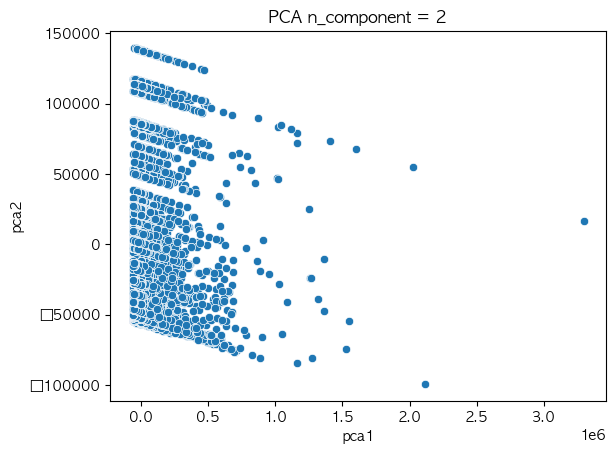

In [57]:
# 2차원 시각화
plt.rcParams['font.family'] = 'AppleGothic'

sns.scatterplot(
    x="pca1",
    y="pca2",
    palette='muted',
    data= pca_2_df
)

plt.title("PCA n_component = 2")
plt.show()

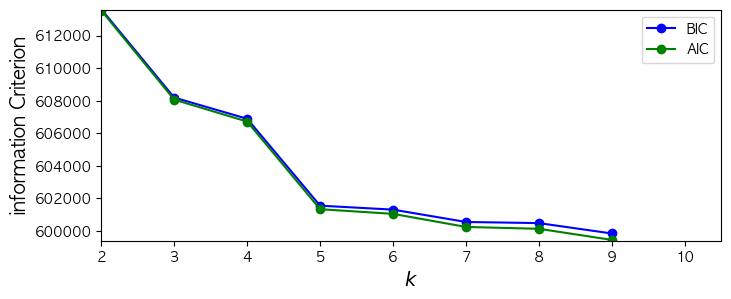

In [58]:
# component 개수 찾기
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(pca_2_df)
             for k in range(2, 10)]
# atrribute_error가 뜨면 범위를 1을 제외하고 입력할 것

bics = [model.bic(pca_2_df) for model in gms_per_k]
aics = [model.aic(pca_2_df) for model in gms_per_k]

plt.figure(figsize = (8,3))
plt.plot(range(2,10),bics, "bo-", label="BIC")
plt.plot(range(2,10),aics, "go-", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("information Criterion", fontsize=14)
plt.axis([2, 10.5, np.min(aics)-50, np.max(aics)+50])
# plt.annotate('Minimum',
#              xy=(7, bics[6]),
#              xytext=(0.35, 0.6),
#              textcoords='figure fraction',
#              fontsize = 14,
#              arrowprops=dict(facecolor = "black", shrink= 0.1)
#              )
plt.legend()

# 그림 저장
# save_fit("aic_bic_vs_k_plot")
plt.show()

In [59]:
# 클래스 8개
from sklearn.mixture import GaussianMixture

gmm_9 = GaussianMixture(n_components=8, random_state=42).fit(pca_2_df)
gmm_cluster_labels = gmm_9.predict(pca_2_df)

bus_on_df['gmm_cluster'] = gmm_cluster_labels
pca_2_df['gmm_cluster'] = gmm_cluster_labels

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_30065/1721233341.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_on_df['gmm_cluster'] = gmm_cluster_labels


/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


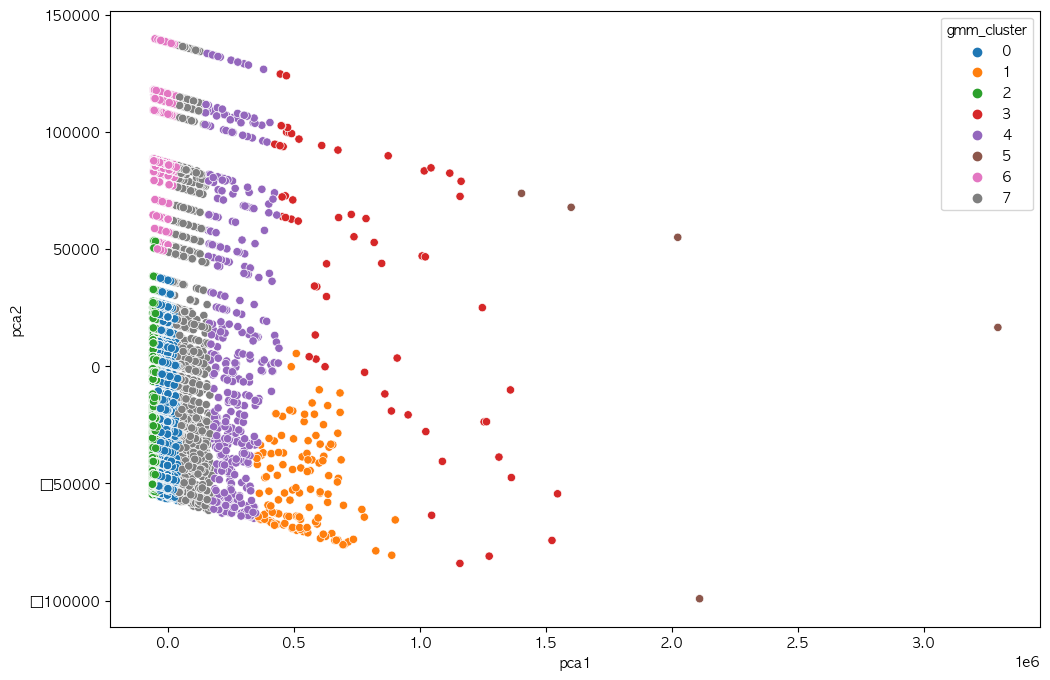

In [60]:
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="pca1",y="pca2",hue="gmm_cluster",data=pca_2_df, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

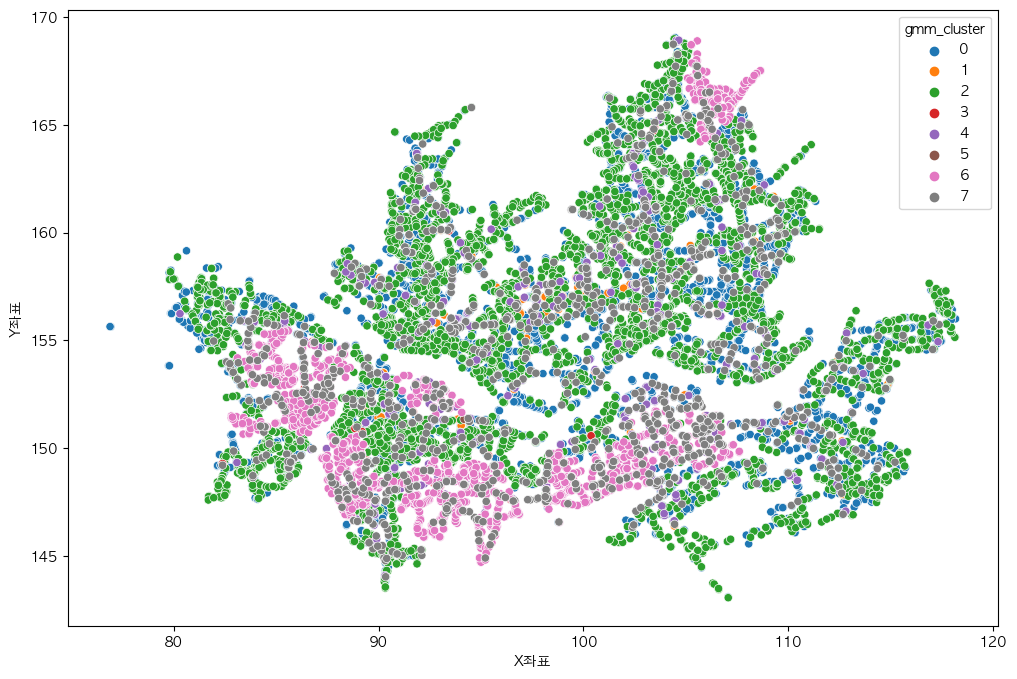

In [61]:
좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID',"정류소명"]]
total = pd.concat([bus_on_df,좌표],axis=1)

 # 좌표 스케일링을 위한 형식 변환
total["X좌표"]=total["X좌표"].astype("float64")
total["Y좌표"]=total["Y좌표"].astype("float64")
    
total["X좌표"]=(total["X좌표"]-126)*100
total["Y좌표"]=(total["Y좌표"]-36)*100

# total.loc[total["NODE_ID"].isin(NODE_ID_list),"gmm_cluster"]=11+2

# 클래스를 기준으로 정렬
total_off_다람쥐 = total.sort_values(by="gmm_cluster")

# 좌표를 바탕으로 군집 시각화
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="X좌표",y="Y좌표",hue="gmm_cluster",data=total_off_다람쥐, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

In [62]:
# 다람쥐 버스 군집 확인
start_off_station = ["111000128","113000113","120000156","120000109","105000127","122000305","123000209"]
end_off_station = ["111000291","113000111", "120000007","120000018","105000072","122000302","123000043"]
다람쥐_start_off_class = []
for i in start_off_station:
    다람쥐_start_off_class.append(total_off_다람쥐.loc[total_off_다람쥐["NODE_ID"]==i,"gmm_cluster"].values[0])
    
다람쥐_end_off_class = []
for j in end_off_station:
    다람쥐_end_off_class.append(total_off_다람쥐.loc[total_off_다람쥐["NODE_ID"]==j,"gmm_cluster"].values[0])

print(set(다람쥐_start_off_class))
print(set(다람쥐_end_off_class))

{0, 6, 7}
{0, 1, 3, 4, 5}


In [63]:
total_off_다람쥐.loc[total_off_다람쥐["gmm_cluster"]==4,:]

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
7650            21                 8         1             112           1   
5432            50                 2         1             773           2   
5485            26                 8         0              95           1   
7271           123                 9         2             678           4   
528            114                10         0            1394           1   
...            ...               ...       ...             ...         ...   
11593          106                15         0             461           2   
3598            80                14         2             690           6   
3345            61                11         2             246           3   
11642          140                18         3             535           5   
3346            61                10         2             290           3   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  ...  \
7650                0           0         1        20             7  ...   
5432                1           1         3       211            34  ...   
5485                0           0         2        32            10  ...   
7271                0           1         0       128            90  ...   
528                 0           2        11       390            97  ...   
...               ...         ...       ...       ...           ...  ...   
11593               0           2         5       154            49  ...   
3598                0           1         1        93            89  ...   
3345                0           0         0        44            14  ...   
11642               0           1         0       114           132  ...   
3346                0           0         0        52            22  ...   

       alone_ratio  emp_corp_ratio  population_15to64  RIDE_SUM_6_10  \
7650      0.189881        5.434933              83913          88477   
5432      0.419874        6.553488               3683         112078   
5485      0.248558        3.625928              27493         108459   
7271      0.185328        5.898160              54807          22139   
528       0.247525       11.950588                 70         202632   
...            ...             ...                ...            ...   
11593     0.139634        4.642696              32560         419259   
3598      0.146111        3.084936              92430          74017   
3345      0.146111        3.084936              92430         570403   
11642     0.088997        4.565898              73726          87097   
3346      0.146111        3.084936              92430         192181   

       gmm_cluster  bgm_cluster        X좌표         Y좌표    NODE_ID  \
7650             4            2   87.46047  149.979748  116000005   
5432             4           13   93.89237  156.013260  112000015   
5485             4           14   93.60660  157.824484  112000073   
7271             4            3   83.92200  155.850200  115000594   
528              4            0   98.65234  156.624623  101000059   
...            ...          ...        ...         ...        ...   
11593            4           14  110.58262  150.680017  123000003   
3598             4           12  103.09029  161.272653  108900049   
3345             4           12  102.87194  161.971409  108000009   
11642            4           14  108.72805  151.177229  123000052   
3346             4           12  102.92481  161.883721  108000010   

                     정류소명  
7650           구일역.중앙유통상가  
5432              세브란스병원앞  
5485        서대문구청.보건소.구의회  
7271                  발산역  
528    을지로2가.기업은행본점.서울노동청  
...                   ...  
11593           석촌호수.한솔병원  
3598               미아사거리역  
3345           도봉세무서.성북시장  
11642      잠실새내역.잠실2동주민센터  
3346           도봉세무서.성북시장  

[434 rows x 24 columns]

In [64]:
total_off_다람쥐.loc[total_off_다람쥐["gmm_cluster"]==6,:]

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
10723           16                 3         0              18           3   
10711           74                 4         0             175           6   
10698           40                 6         0              52           5   
10699           86                14         1             238           0   
6541           135                17         2             142           5   
...            ...               ...       ...             ...         ...   
10088           55                 9         0             153           8   
10087           10                 7         0              17           3   
10160           42                17         0             311           1   
10155           55                12         1             532           2   
10069           59                12         0             174           7   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  ...  \
10723               0           0         1        10             3  ...   
10711               0           1         2        57            39  ...   
10698               0           0         0        29             5  ...   
10699               0           1         0        82            43  ...   
6541                0           0         1        34            14  ...   
...               ...         ...       ...       ...           ...  ...   
10088               1           0         0        27            22  ...   
10087               1           0         0         2             3  ...   
10160               1           1         0        69            49  ...   
10155               0           1         1       119            40  ...   
10069               1           0         0        37            40  ...   

       alone_ratio  emp_corp_ratio  population_15to64  RIDE_SUM_6_10  \
10723     0.114818        6.229384              80788          61645   
10711     0.114818        6.229384              80788          42698   
10698     0.114818        6.229384              80788           9896   
10699     0.114818        6.229384              80788          28796   
6541      0.079399        4.072888             106358          49770   
...            ...             ...                ...            ...   
10088     0.288663        3.375476             182596          16476   
10087     0.288663        3.375476             182596          87241   
10160     0.288663        3.375476             182596          11666   
10155     0.258852        3.828980             170048           1597   
10069     0.288663        3.375476             182596         125307   

       gmm_cluster  bgm_cluster        X좌표         Y좌표    NODE_ID  \
10723            6           18  100.63736  147.743898  121900083   
10711            6           18   99.35074  147.993864  121900071   
10698            6           18   99.10358  147.913739  121900058   
10699            6           18   99.23780  148.935782  121900059   
6541             6            8   86.99099  153.432434  114000003   
...            ...          ...        ...         ...        ...   
10088            6            1   91.31844  147.557080  120900043   
10087            6            1   92.73355  146.171592  120900042   
10160            6            1   91.43778  148.327404  120900115   
10155            6            1   95.94607  147.751690  120900110   
10069            6            1   91.60901  147.768059  120900024   

                  정류소명  
10723         래미안방배아트힐  
10711          대우효령아파트  
10698             백산빌딩  
10699  방배열린문화센터.가야치과병원  
6541           목동3단지후문  
...                ...  
10088            미성중학교  
10087       삼성산주공307동앞  
10160            난곡사거리  
10155            낙성대입구  
10069           신림고등학교  

[1739 rows x 24 columns]

# 승차인원과 재차인원 피처 사용하기

In [65]:
# 버스 재차 인원
Bus_Num_Passengers=call_dataframe("`Bus_Num_Passengers`")

컬럼명 :  ['기준_날짜', '노선_ID', '출발_정류장_ID', '도착_정류장_ID', '정류장_순서', '재차인원합_일', '재차인원합_6시', '재차인원합_7시', '재차인원합_8시', '재차인원합_9시', '재차인원합_10시']


In [66]:
Bus_Num_Passengers_230605 = Bus_Num_Passengers.loc[Bus_Num_Passengers["기준_날짜"]==20230605,:]

In [67]:
Bus_Num_Passengers_230605["재차인원합_6_10"]=Bus_Num_Passengers_230605.loc[:,"재차인원합_6시"]+ Bus_Num_Passengers_230605.loc[:,"재차인원합_7시"]+Bus_Num_Passengers_230605.loc[:,"재차인원합_8시"]+Bus_Num_Passengers_230605.loc[:,"재차인원합_9시"]

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_30065/3181694813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bus_Num_Passengers_230605["재차인원합_6_10"]=Bus_Num_Passengers_230605.loc[:,"재차인원합_6시"]+ Bus_Num_Passengers_230605.loc[:,"재차인원합_7시"]+Bus_Num_Passengers_230605.loc[:,"재차인원합_8시"]+Bus_Num_Passengers_230605.loc[:,"재차인원합_9시"]


In [68]:
Bus_Num_Passengers_230605

기준_날짜      노선_ID  출발_정류장_ID  도착_정류장_ID  정류장_순서  재차인원합_일  재차인원합_6시  \
0      20230605  100100001  100000004  101000001      23      706      10.0   
1      20230605  100100001  100000023  100000415      16     1654      17.0   
2      20230605  100100001  100000104  100000413      21      857       5.0   
3      20230605  100100001  100000413  100000004      22      873      10.0   
4      20230605  100100001  100000415  100000416      17     1453      15.0   
...         ...        ...        ...        ...     ...      ...       ...   
37787  20230605  124900003  124900124  124900122      56      581      51.0   
37788  20230605  124900003  124900127  124900129       2       53       1.0   
37789  20230605  124900003  124900128  124900111      76       78       7.0   
37790  20230605  124900003  124900129  124000459       3       83       6.0   
37791  20230605  124900003  124900130  124900128      75       87       8.0   

       재차인원합_7시  재차인원합_8시  재차인원합_9시  재차인원합_10시  재차인원합_6_10  
0          16.0      13.0      12.0       22.0        51.0  
1          94.0      93.0     281.0      182.0       485.0  
2          15.0      14.0      13.0       28.0        47.0  
3          16.0      17.0      17.0       28.0        60.0  
4          82.0      71.0     241.0      148.0       409.0  
...         ...       ...       ...        ...         ...  
37787      36.0      33.0      24.0       37.0       144.0  
37788       9.0       3.0       4.0        2.0        17.0  
37789       6.0       4.0       3.0        3.0        20.0  
37790      15.0       7.0       4.0        4.0        32.0  
37791       6.0       4.0       4.0        5.0        22.0  

[37792 rows x 12 columns]

In [69]:
data_df_on_passenger=data_df_on.copy()

In [70]:
data_df_on_passenger = final_tb_infra_population[['NODE_ID','academy_cnt','kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt','university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt',
       'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt',
       'alone_ratio', 'emp_corp_ratio', 'population_15to64','RIDE_SUM_6_10']]

In [71]:
data_df_on_passenger["NODE_ID"]=data_df_on_passenger["NODE_ID"].astype("int64")

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_30065/687709107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_on_passenger["NODE_ID"]=data_df_on_passenger["NODE_ID"].astype("int64")


In [72]:
Bus_Num_Passengers_230605_group=Bus_Num_Passengers_230605.groupby(by="출발_정류장_ID").sum().reset_index()

In [73]:
Bus_Num_Passengers_230605_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12366 entries, 0 to 12365
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   출발_정류장_ID   12366 non-null  int64  
 1   기준_날짜       12366 non-null  int64  
 2   노선_ID       12366 non-null  int64  
 3   도착_정류장_ID   12366 non-null  int64  
 4   정류장_순서      12366 non-null  int64  
 5   재차인원합_일     12366 non-null  int64  
 6   재차인원합_6시    12366 non-null  float64
 7   재차인원합_7시    12366 non-null  float64
 8   재차인원합_8시    12366 non-null  float64
 9   재차인원합_9시    12366 non-null  float64
 10  재차인원합_10시   12366 non-null  float64
 11  재차인원합_6_10  12366 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 1.1 MB


In [74]:
bus_passenger_on = pd.merge(left=data_df_on_passenger,right=Bus_Num_Passengers_230605_group,left_on="NODE_ID",right_on="출발_정류장_ID",how="outer")
bus_passenger_on.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14479 entries, 0 to 14478
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NODE_ID            12548 non-null  float64
 1   academy_cnt        12548 non-null  float64
 2   kindergarten_cnt   12548 non-null  float64
 3   mart_cnt           12548 non-null  float64
 4   restaurant_cnt     12548 non-null  float64
 5   school_cnt         12548 non-null  float64
 6   university_cnt     12548 non-null  float64
 7   subway_cnt         12548 non-null  float64
 8   tour_cnt           12548 non-null  float64
 9   cafe_cnt           12548 non-null  float64
 10  hospital_cnt       12548 non-null  float64
 11  culture_cnt        12548 non-null  float64
 12  univ_hospital_cnt  12548 non-null  float64
 13  public_office_cnt  12548 non-null  float64
 14  employee_cnt       12548 non-null  float64
 15  alone_ratio        12548 non-null  float64
 16  emp_corp_ratio     125

In [75]:
bus_passenger_on=bus_passenger_on[['NODE_ID','academy_cnt', 'kindergarten_cnt', 'mart_cnt',
       'restaurant_cnt', 'school_cnt', 'university_cnt', 'subway_cnt',
       'tour_cnt', 'cafe_cnt', 'hospital_cnt', 'culture_cnt',
       'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt', 'alone_ratio',
       'emp_corp_ratio', 'population_15to64','RIDE_SUM_6_10', '재차인원합_6_10']]

In [76]:
bus_passenger_on

NODE_ID  academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  \
0      100000001.0        185.0               8.0       0.0          1495.0   
1      100000002.0          2.0               4.0       0.0           199.0   
2      100000003.0         49.0               2.0       1.0           567.0   
3      100000004.0        166.0              10.0       0.0          1403.0   
4      100000005.0         72.0               8.0       3.0           596.0   
...            ...          ...               ...       ...             ...   
14474          NaN          NaN               NaN       NaN             NaN   
14475          NaN          NaN               NaN       NaN             NaN   
14476          NaN          NaN               NaN       NaN             NaN   
14477          NaN          NaN               NaN       NaN             NaN   
14478          NaN          NaN               NaN       NaN             NaN   

       school_cnt  university_cnt  subway_cnt  tour_cnt  cafe_cnt  \
0             0.0             0.0         5.0      16.0     406.0   
1             3.0             0.0         0.0      26.0      88.0   
2             3.0             0.0         1.0      20.0     218.0   
3             1.0             0.0         3.0      13.0     356.0   
4             4.0             1.0         2.0       4.0     237.0   
...           ...             ...         ...       ...       ...   
14474         NaN             NaN         NaN       NaN       NaN   
14475         NaN             NaN         NaN       NaN       NaN   
14476         NaN             NaN         NaN       NaN       NaN   
14477         NaN             NaN         NaN       NaN       NaN   
14478         NaN             NaN         NaN       NaN       NaN   

       hospital_cnt  culture_cnt  univ_hospital_cnt  public_office_cnt  \
0              62.0         68.0                0.0               10.0   
1              12.0         19.0                0.0                1.0   
2              32.0        146.0                0.0                2.0   
3              73.0         50.0                0.0                7.0   
4              36.0        145.0                0.0                4.0   
...             ...          ...                ...                ...   
14474           NaN          NaN                NaN                NaN   
14475           NaN          NaN                NaN                NaN   
14476           NaN          NaN                NaN                NaN   
14477           NaN          NaN                NaN                NaN   
14478           NaN          NaN                NaN                NaN   

       employee_cnt  alone_ratio  emp_corp_ratio  population_15to64  \
0            4091.0     0.401961        6.382215              149.0   
1            5952.0     0.280998       10.553191             1943.0   
2            1495.0     0.278683        4.018817             2336.0   
3            4091.0     0.401961        6.382215              149.0   
4            1495.0     0.278683        4.018817             2336.0   
...             ...          ...             ...                ...   
14474           NaN          NaN             NaN                NaN   
14475           NaN          NaN             NaN                NaN   
14476           NaN          NaN             NaN                NaN   
14477           NaN          NaN             NaN                NaN   
14478           NaN          NaN             NaN                NaN   

       RIDE_SUM_6_10  재차인원합_6_10  
0            84743.0      1267.0  
1           387688.0     11578.0  
2           406570.0     11946.0  
3            22643.0      1368.0  
4           294069.0     12140.0  
...              ...         ...  
14474            NaN         1.0  
14475            NaN       144.0  
14476            NaN       443.0  
14477            NaN       143.0  
14478            NaN       445.0  

[14479 rows x 20 columns]

In [77]:
len(bus_passenger_on.columns)

20

In [78]:
bus_passenger_on.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14479 entries, 0 to 14478
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NODE_ID            12548 non-null  float64
 1   academy_cnt        12548 non-null  float64
 2   kindergarten_cnt   12548 non-null  float64
 3   mart_cnt           12548 non-null  float64
 4   restaurant_cnt     12548 non-null  float64
 5   school_cnt         12548 non-null  float64
 6   university_cnt     12548 non-null  float64
 7   subway_cnt         12548 non-null  float64
 8   tour_cnt           12548 non-null  float64
 9   cafe_cnt           12548 non-null  float64
 10  hospital_cnt       12548 non-null  float64
 11  culture_cnt        12548 non-null  float64
 12  univ_hospital_cnt  12548 non-null  float64
 13  public_office_cnt  12548 non-null  float64
 14  employee_cnt       12548 non-null  float64
 15  alone_ratio        12548 non-null  float64
 16  emp_corp_ratio     125

In [79]:
bus_passenger_on.loc[bus_passenger_on["재차인원합_6_10"].isna(),:]

NODE_ID  academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  \
24     100000026.0         23.0               8.0       1.0           638.0   
25     100000027.0         20.0               9.0       1.0           494.0   
66     100000071.0         48.0               7.0       1.0            67.0   
69     100000074.0         90.0              14.0       2.0           268.0   
77     100000082.0         21.0               4.0       0.0           591.0   
...            ...          ...               ...       ...             ...   
12521  124900111.0          0.0               2.0       0.0             9.0   
12523  124900113.0        223.0              19.0       2.0           175.0   
12525  124900115.0        155.0              14.0       0.0           117.0   
12535  124900125.0         18.0               5.0       1.0            17.0   
12536  124900126.0         19.0               5.0       1.0            15.0   

       school_cnt  university_cnt  subway_cnt  tour_cnt  cafe_cnt  \
24            2.0             0.0         1.0       6.0     216.0   
25            5.0             0.0         1.0       7.0     184.0   
66            4.0             0.0         1.0       1.0      18.0   
69            5.0             0.0         0.0       3.0      52.0   
77            1.0             0.0         3.0       5.0     128.0   
...           ...             ...         ...       ...       ...   
12521         2.0             0.0         0.0       0.0       0.0   
12523         3.0             0.0         1.0       0.0      58.0   
12525         5.0             0.0         0.0       1.0      41.0   
12535         2.0             0.0         0.0       0.0       6.0   
12536         2.0             0.0         0.0       0.0       6.0   

       hospital_cnt  culture_cnt  univ_hospital_cnt  public_office_cnt  \
24             59.0         62.0                0.0               30.0   
25             57.0         51.0                0.0               17.0   
66             12.0          5.0                0.0                2.0   
69             49.0          8.0                0.0                5.0   
77             55.0         20.0                0.0                3.0   
...             ...          ...                ...                ...   
12521           0.0          0.0                0.0                0.0   
12523          54.0          4.0                0.0                1.0   
12525          18.0          4.0                0.0                1.0   
12535          10.0          0.0                0.0                0.0   
12536          10.0          0.0                0.0                0.0   

       employee_cnt  alone_ratio  emp_corp_ratio  population_15to64  \
24           4475.0     0.179971       10.334873              492.0   
25           4475.0     0.179971       10.334873              492.0   
66           1669.0     0.062256        4.662011             5474.0   
69           1380.0     0.126087       13.663366             1160.0   
77           4091.0     0.401961        6.382215              149.0   
...             ...          ...             ...                ...   
12521        4144.0     0.074649        4.232891            16714.0   
12523       12523.0     0.059752        3.497068            29747.0   
12525       12523.0     0.059752        3.497068            29747.0   
12535        4144.0     0.074649        4.232891            16714.0   
12536        4144.0     0.074649        4.232891            16714.0   

       RIDE_SUM_6_10  재차인원합_6_10  
24           61645.0         NaN  
25           61645.0         NaN  
66           61645.0         NaN  
69           61645.0         NaN  
77           61645.0         NaN  
...              ...         ...  
12521           61.0         NaN  
12523         2028.0         NaN  
12525         1511.0         NaN  
12535        13396.0         NaN  
12536           43.0         NaN  

[2113 rows x 20 columns]

In [80]:
# 처음에는 DF의 피처 개수만큼 넣어서 기여율을 확인하다. 그 후의 적합한 component의 개수를 생각
pca = PCA(n_components = 19)
pca_array = pca.fit_transform(bus_passenger_on)
pca_df = pd.DataFrame(pca_array,columns=[f'pca{num+1}' for num in range(bus_passenger_on.shape[1])])
pca_df.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
                       '기여율':pca.explained_variance_ratio_},
                      index=np.array([f'pca{num+1}' for num in range(bus_passenger_on.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

설명가능한 분산 비율(고윳값)           기여율     누적기여율
pca1       1.008935e+10  7.393754e-01  0.739375
pca2       2.399794e+09  1.758636e-01  0.915239
pca3       1.156004e+09  8.471520e-02  0.999954
pca4       5.711011e+05  4.185188e-05  0.999996
pca5       4.945082e+04  3.623894e-06  1.000000
pca6       3.049253e+03  2.234578e-07  1.000000
pca7       8.789519e+02  6.441205e-08  1.000000
pca8       5.100424e+02  3.737733e-08  1.000000
pca9       7.077006e+01  5.186227e-09  1.000000
pca10      3.774929e+01  2.766373e-09  1.000000
pca11      6.004671e+00  4.400391e-10  1.000000
pca12      3.439491e+00  2.520555e-10  1.000000
pca13      3.002292e+00  2.200164e-10  1.000000
pca14      2.472984e+00  1.812272e-10  1.000000
pca15      8.440859e-01  6.185697e-11  1.000000
pca16      5.644886e-01  4.136730e-11  1.000000
pca17      3.105307e-01  2.275655e-11  1.000000
pca18      5.376026e-02  3.939702e-12  1.000000
pca19      3.736768e-03  2.738408e-13  1.000000

In [ ]:
# n_components : 축소할 차원. 주성분 개수. 분산이 가장 큰 벡터의 개수

pca_2 = PCA(n_components=2)
pca_array = pca_2.fit_transform(bus_passenger_on)
pca_2_df = pd.DataFrame(pca_array,
                      columns=['pca1','pca2'])
pca_2_df.head()

pca1          pca2
0   18938.508266 -55977.888687
1   87717.563563 -58751.642111
2  331544.979292 -68563.750112
3   15112.701870 -55822.662220
4  321809.472169 -65600.994159

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


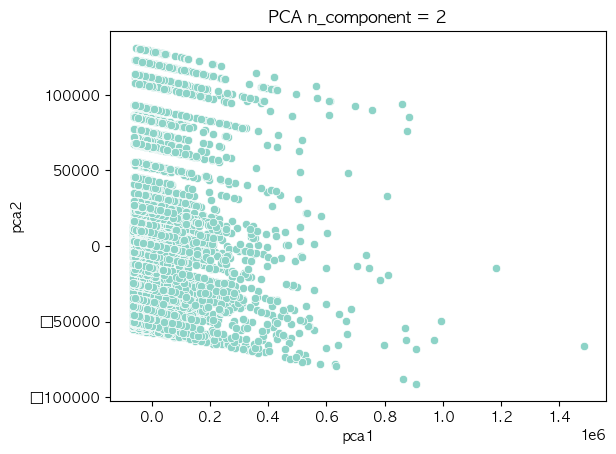

In [ ]:
# 2차원 시각화
plt.rcParams['font.family'] = 'AppleGothic'

sns.scatterplot(
    x="pca1",
    y="pca2",
    palette='muted',
    data= pca_2_df
)

plt.title("PCA n_component = 2")
plt.show()

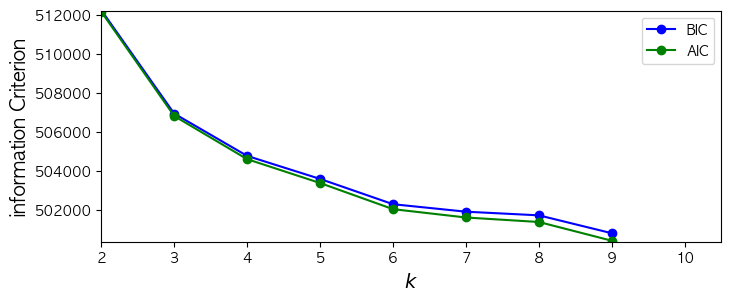

In [ ]:
# component 개수 찾기
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(pca_2_df)
             for k in range(2, 10)]
# atrribute_error가 뜨면 범위를 1을 제외하고 입력할 것

bics = [model.bic(pca_2_df) for model in gms_per_k]
aics = [model.aic(pca_2_df) for model in gms_per_k]

plt.figure(figsize = (8,3))
plt.plot(range(2,10),bics, "bo-", label="BIC")
plt.plot(range(2,10),aics, "go-", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("information Criterion", fontsize=14)
plt.axis([2, 10.5, np.min(aics)-50, np.max(aics)+50])
# plt.annotate('Minimum',
#              xy=(7, bics[6]),
#              xytext=(0.35, 0.6),
#              textcoords='figure fraction',
#              fontsize = 14,
#              arrowprops=dict(facecolor = "black", shrink= 0.1)
#              )
plt.legend()

# 그림 저장
# save_fit("aic_bic_vs_k_plot")
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

gmm_9 = GaussianMixture(n_components=9, random_state=42).fit(pca_2_df)
gmm_cluster_labels = gmm_9.predict(pca_2_df)

# data 변경할 것
bus_passenger_on['gmm_cluster'] = gmm_cluster_labels
pca_2_df['gmm_cluster'] = gmm_cluster_labels

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


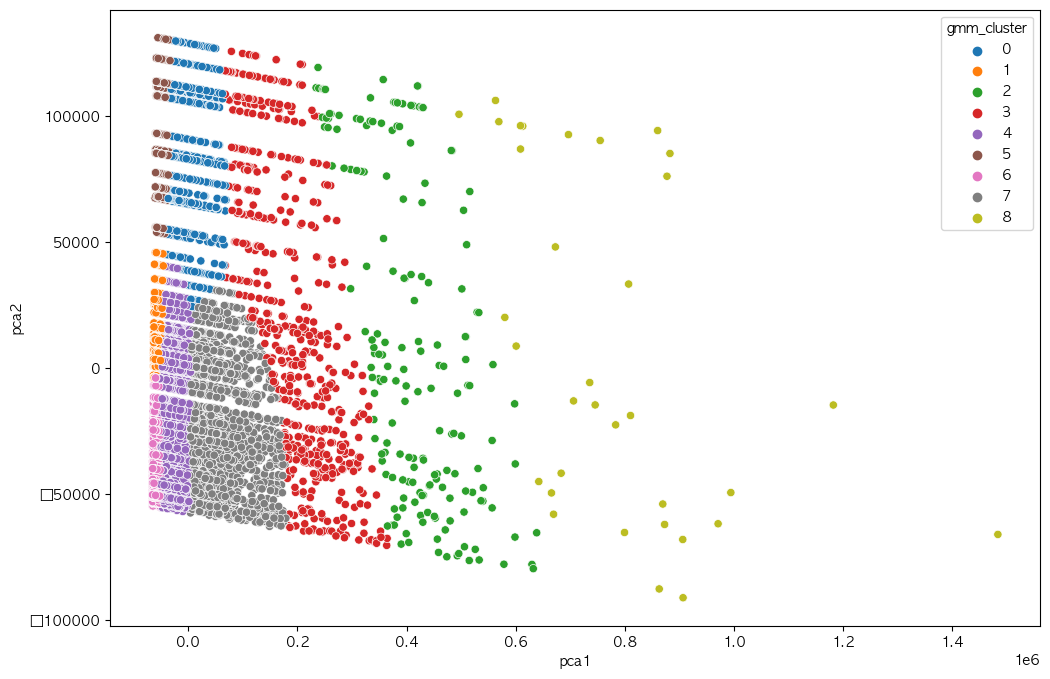

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="pca1",y="pca2",hue="gmm_cluster",data=pca_2_df, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

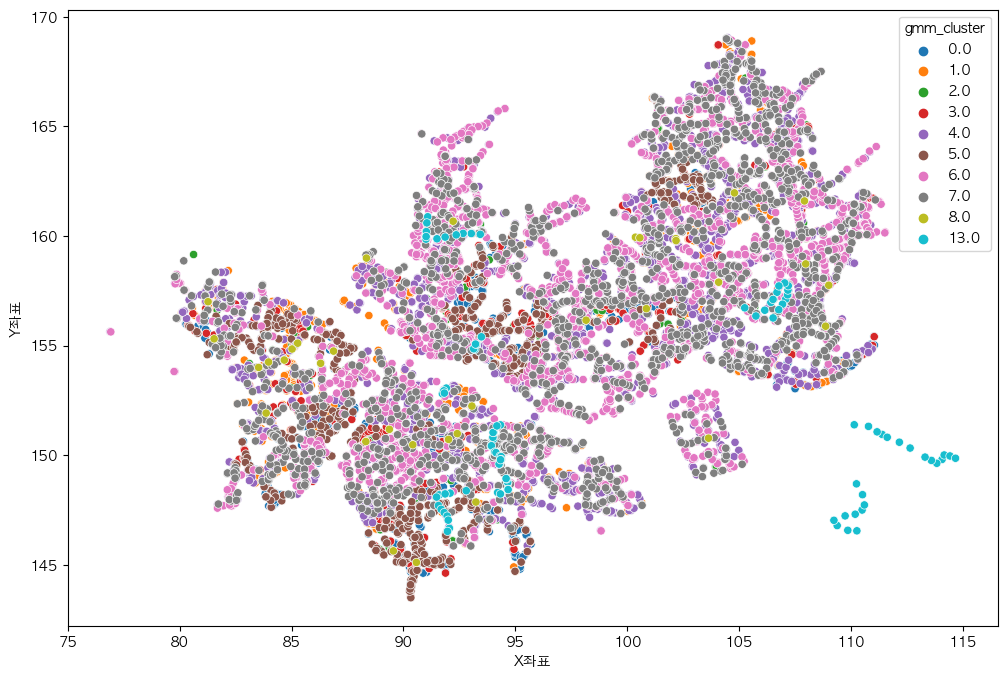

In [ ]:
좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID',"정류소명"]]
total = pd.concat([bus_passenger_on,좌표],axis=1)

 # 좌표 스케일링을 위한 형식 변환
total["X좌표"]=total["X좌표"].astype("float64")
total["Y좌표"]=total["Y좌표"].astype("float64")
    
total["X좌표"]=(total["X좌표"]-126)*100
total["Y좌표"]=(total["Y좌표"]-36)*100

total.loc[total["NODE_ID"].isin(NODE_ID_list),"gmm_cluster"]=11+2

# 클래스를 기준으로 정렬
total_off_다람쥐 = total.sort_values(by="gmm_cluster")

# 좌표를 바탕으로 군집 시각화
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="X좌표",y="Y좌표",hue="gmm_cluster",data=total_off_다람쥐, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

# 스케일링 진행 후 PCA 및 GMM 실행

In [213]:
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

minmax_data=data_df.copy()
standard_data=data_df.copy()
robust_data=data_df.copy()

minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()

minmax_scaled = minmax_scaler.fit_transform(minmax_data)
standard_scaled = standard_scaler.fit_transform(standard_data)
robust_scaled = robust_scaler.fit_transform(robust_data)

robust_on_scaled = robust_scaler.fit_transform(data_df_on)


In [215]:
minmax_scaled_df = pd.DataFrame(minmax_scaled,columns=minmax_data.columns)
standard_scaled_df = pd.DataFrame(standard_scaled,columns=minmax_data.columns)
robust_scaled_df = pd.DataFrame(robust_scaled,columns=minmax_data.columns)

robust_on_scaled_df = pd.DataFrame(robust_on_scaled,columns=data_df_on.columns)

In [121]:
# 처음에는 DF의 피처 개수만큼 넣어서 기여율을 확인하다. 그 후의 적합한 component의 개수를 생각
pca = PCA(n_components = 17)
pca_array = pca.fit_transform(minmax_scaled_df)
pca_df = pd.DataFrame(pca_array,columns=[f'pca{num+1}' for num in range(data_df.shape[1])])

# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
                       '기여율':pca.explained_variance_ratio_},
                      index=np.array([f'pca{num+1}' for num in range(data_df.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

설명가능한 분산 비율(고윳값)       기여율     누적기여율
pca1           0.074585  0.213420  0.213420
pca2           0.058952  0.168688  0.382109
pca3           0.038959  0.111479  0.493588
pca4           0.037609  0.107615  0.601203
pca5           0.029688  0.084951  0.686153
pca6           0.022655  0.064826  0.750979
pca7           0.017118  0.048981  0.799960
pca8           0.016050  0.045925  0.845885
pca9           0.013526  0.038703  0.884589
pca10          0.012978  0.037137  0.921726
pca11          0.011298  0.032330  0.954056
pca12          0.005297  0.015158  0.969213
pca13          0.003454  0.009883  0.979097
pca14          0.002776  0.007944  0.987041
pca15          0.002139  0.006121  0.993162
pca16          0.001549  0.004433  0.997595
pca17          0.000840  0.002405  1.000000

In [122]:
# 처음에는 DF의 피처 개수만큼 넣어서 기여율을 확인하다. 그 후의 적합한 component의 개수를 생각
pca = PCA(n_components = 17)
pca_array = pca.fit_transform(standard_scaled_df)
pca_df = pd.DataFrame(pca_array,columns=[f'pca{num+1}' for num in range(data_df.shape[1])])

# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
                       '기여율':pca.explained_variance_ratio_},
                      index=np.array([f'pca{num+1}' for num in range(data_df.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

설명가능한 분산 비율(고윳값)       기여율     누적기여율
pca1           4.057578  0.238662  0.238662
pca2           2.257056  0.132757  0.371419
pca3           1.677395  0.098662  0.470082
pca4           1.438336  0.084601  0.554683
pca5           1.137330  0.066896  0.621580
pca6           0.888449  0.052258  0.673837
pca7           0.810010  0.047644  0.721481
pca8           0.756339  0.044487  0.765968
pca9           0.733149  0.043123  0.809091
pca10          0.681382  0.040078  0.849169
pca11          0.600307  0.035309  0.884478
pca12          0.523235  0.030776  0.915255
pca13          0.419104  0.024651  0.939906
pca14          0.384561  0.022619  0.962525
pca15          0.304918  0.017935  0.980460
pca16          0.267741  0.015748  0.996208
pca17          0.064464  0.003792  1.000000

In [123]:
# 처음에는 DF의 피처 개수만큼 넣어서 기여율을 확인하다. 그 후의 적합한 component의 개수를 생각
pca = PCA(n_components = 17)
pca_array = pca.fit_transform(robust_scaled_df)
pca_df = pd.DataFrame(pca_array,columns=[f'pca{num+1}' for num in range(data_df.shape[1])])

# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
                       '기여율':pca.explained_variance_ratio_},
                      index=np.array([f'pca{num+1}' for num in range(data_df.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

설명가능한 분산 비율(고윳값)       기여율     누적기여율
pca1          11.844088  0.462052  0.462052
pca2           3.232179  0.126091  0.588143
pca3           2.267649  0.088464  0.676607
pca4           1.693721  0.066074  0.742681
pca5           1.346116  0.052514  0.795195
pca6           1.208023  0.047126  0.842321
pca7           0.768029  0.029962  0.872283
pca8           0.677501  0.026430  0.898713
pca9           0.544150  0.021228  0.919941
pca10          0.429662  0.016762  0.936703
pca11          0.398891  0.015561  0.952264
pca12          0.351085  0.013696  0.965960
pca13          0.283829  0.011073  0.977033
pca14          0.276520  0.010787  0.987820
pca15          0.188596  0.007357  0.995177
pca16          0.067871  0.002648  0.997825
pca17          0.055749  0.002175  1.000000

In [216]:
# 처음에는 DF의 피처 개수만큼 넣어서 기여율을 확인하다. 그 후의 적합한 component의 개수를 생각
pca = PCA(n_components = 18)
pca_array = pca.fit_transform(robust_on_scaled_df)
pca_df = pd.DataFrame(pca_array,columns=[f'pca{num+1}' for num in range(data_df_on.shape[1])])

# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
                       '기여율':pca.explained_variance_ratio_},
                      index=np.array([f'pca{num+1}' for num in range(data_df_on.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

설명가능한 분산 비율(고윳값)       기여율     누적기여율
pca1          11.853824  0.415276  0.415276
pca2           3.519884  0.123313  0.538589
pca3           2.644204  0.092635  0.631224
pca4           2.246009  0.078685  0.709908
pca5           1.692065  0.059278  0.769187
pca6           1.345850  0.047149  0.816336
pca7           1.205484  0.042232  0.858568
pca8           0.766506  0.026853  0.885421
pca9           0.676375  0.023696  0.909117
pca10          0.544135  0.019063  0.928179
pca11          0.429343  0.015041  0.943221
pca12          0.398655  0.013966  0.957187
pca13          0.351027  0.012298  0.969484
pca14          0.283447  0.009930  0.979414
pca15          0.275582  0.009654  0.989069
pca16          0.188595  0.006607  0.995676
pca17          0.067690  0.002371  0.998047
pca18          0.055741  0.001953  1.000000

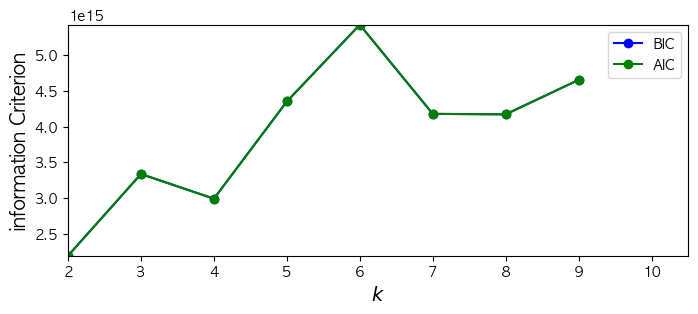

In [143]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(minmax_scaled_df)
             for k in range(2, 10)]
# atrribute_error가 뜨면 범위를 1을 제외하고 입력할 것

bics = [model.bic(data_df) for model in gms_per_k]
aics = [model.aic(data_df) for model in gms_per_k]

plt.figure(figsize = (8,3))
plt.plot(range(2,10),bics, "bo-", label="BIC")
plt.plot(range(2,10),aics, "go-", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("information Criterion", fontsize=14)
plt.axis([2, 10.5, np.min(aics)-50, np.max(aics)+50])

plt.legend()

# 그림 저장
# save_fit("aic_bic_vs_k_plot")
plt.show()

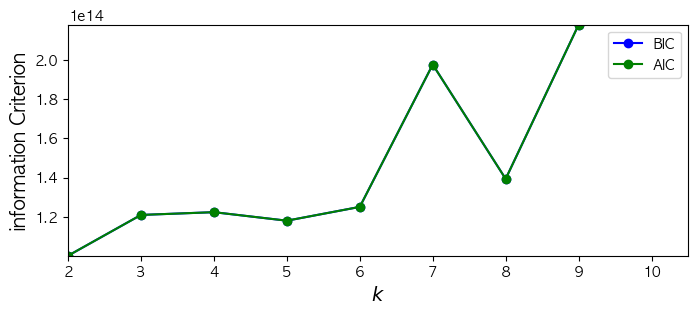

In [144]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(standard_scaled_df)
             for k in range(2, 10)]
# atrribute_error가 뜨면 범위를 1을 제외하고 입력할 것

bics = [model.bic(data_df) for model in gms_per_k]
aics = [model.aic(data_df) for model in gms_per_k]

plt.figure(figsize = (8,3))
plt.plot(range(2,10),bics, "bo-", label="BIC")
plt.plot(range(2,10),aics, "go-", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("information Criterion", fontsize=14)
plt.axis([2, 10.5, np.min(aics)-50, np.max(aics)+50])

plt.legend()

# 그림 저장
# save_fit("aic_bic_vs_k_plot")
plt.show()

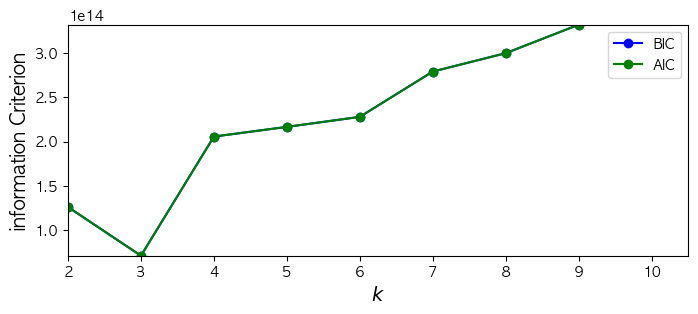

In [145]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(robust_scaled_df)
             for k in range(2, 10)]
# atrribute_error가 뜨면 범위를 1을 제외하고 입력할 것

bics = [model.bic(data_df) for model in gms_per_k]
aics = [model.aic(data_df) for model in gms_per_k]

plt.figure(figsize = (8,3))
plt.plot(range(2,10),bics, "bo-", label="BIC")
plt.plot(range(2,10),aics, "go-", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("information Criterion", fontsize=14)
plt.axis([2, 10.5, np.min(aics)-50, np.max(aics)+50])

plt.legend()

# 그림 저장
# save_fit("aic_bic_vs_k_plot")
plt.show()

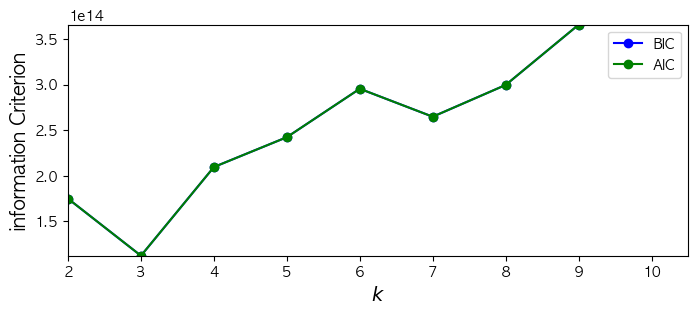

In [218]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(robust_on_scaled_df)
             for k in range(2, 10)]
# atrribute_error가 뜨면 범위를 1을 제외하고 입력할 것

bics = [model.bic(data_df_on) for model in gms_per_k]
aics = [model.aic(data_df_on) for model in gms_per_k]

plt.figure(figsize = (8,3))
plt.plot(range(2,10),bics, "bo-", label="BIC")
plt.plot(range(2,10),aics, "go-", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("information Criterion", fontsize=14)
plt.axis([2, 10.5, np.min(aics)-50, np.max(aics)+50])

plt.legend()

# 그림 저장
# save_fit("aic_bic_vs_k_plot")
plt.show()

In [160]:
# min_max scaling
from sklearn.mixture import GaussianMixture

gmm_4 = GaussianMixture(n_components=9, random_state=42).fit(minmax_scaled_df)
gmm_cluster_labels = gmm_4.predict(minmax_scaled_df)

minmax_scaled_df['gmm_cluster'] = gmm_cluster_labels

In [149]:
# DF에 좌표 및 node_id 합치기
좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID']]
total_minmax = pd.concat([minmax_scaled_df,좌표],axis=1)

# 좌표 스케일링을 위한 형식 변환
total_minmax["X좌표"]=total_minmax["X좌표"].astype("float64")
total_minmax["Y좌표"]=total_minmax["Y좌표"].astype("float64")

# 산점도를 위한 좌표 스케일링
total_minmax["X좌표"] = (total_minmax["X좌표"]-126)*1000
total_minmax["Y좌표"] = (total_minmax["Y좌표"]-36)*1000

# 클래스를 기준으로 정렬
total_minmax_다람쥐 = total_minmax.sort_values(by="gmm_cluster")


In [147]:
# standard scaling
from sklearn.mixture import GaussianMixture

gmm_4 = GaussianMixture(n_components=4, random_state=42).fit(standard_scaled_df)
gmm_cluster_labels = gmm_4.predict(standard_scaled_df)

standard_scaled_df['gmm_cluster'] = gmm_cluster_labels

In [150]:
# DF에 좌표 및 node_id 합치기
좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID']]
total_standard = pd.concat([standard_scaled_df,좌표],axis=1)

# 좌표 스케일링을 위한 형식 변환
total_standard["X좌표"]=total_standard["X좌표"].astype("float64")
total_standard["Y좌표"]=total_standard["Y좌표"].astype("float64")

# 산점도를 위한 좌표 스케일링
total_standard["X좌표"] = (total_standard["X좌표"]-126)*1000
total_standard["Y좌표"] = (total_standard["Y좌표"]-36)*1000

# 클래스를 기준으로 정렬
total_standard_다람쥐 = total_standard.sort_values(by="gmm_cluster")


In [192]:
# robust scaling
from sklearn.mixture import GaussianMixture

gmm_4 = GaussianMixture(n_components=3, random_state=42).fit(robust_scaled_df)
gmm_cluster_labels = gmm_4.predict(robust_scaled_df)

robust_scaled_df['gmm_cluster'] = gmm_cluster_labels

In [193]:
# DF에 좌표 및 node_id 합치기
좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID']]
total_robust = pd.concat([robust_scaled_df,좌표],axis=1)

# 좌표 스케일링을 위한 형식 변환
total_robust["X좌표"]=total_robust["X좌표"].astype("float64")
total_robust["Y좌표"]=total_robust["Y좌표"].astype("float64")

# 산점도를 위한 좌표 스케일링
total_robust["X좌표"] = (total_robust["X좌표"]-126)*1000
total_robust["Y좌표"] = (total_robust["Y좌표"]-36)*1000

# 클래스를 기준으로 정렬
total_robust_다람쥐 = total_robust.sort_values(by="gmm_cluster")


In [219]:
# robust scaling
from sklearn.mixture import GaussianMixture

gmm_4 = GaussianMixture(n_components=3, random_state=42).fit(robust_on_scaled_df)
gmm_cluster_labels = gmm_4.predict(robust_on_scaled_df)

robust_on_scaled_df['gmm_cluster'] = gmm_cluster_labels

# DF에 좌표 및 node_id 합치기
좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID']]
total_robust = pd.concat([robust_on_scaled_df,좌표],axis=1)

# 좌표 스케일링을 위한 형식 변환
total_robust["X좌표"]=total_robust["X좌표"].astype("float64")
total_robust["Y좌표"]=total_robust["Y좌표"].astype("float64")

# 산점도를 위한 좌표 스케일링
total_robust["X좌표"] = (total_robust["X좌표"]-126)*1000
total_robust["Y좌표"] = (total_robust["Y좌표"]-36)*1000

# 클래스를 기준으로 정렬
total_robust_on_다람쥐 = total_robust.sort_values(by="gmm_cluster")

In [134]:
total_minmax_다람쥐

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
12547     0.016166          0.173913  0.000000        0.030321    0.250000   
3064      0.030023          0.108696  0.000000        0.220571    0.250000   
3072      0.039261          0.152174  0.000000        0.249108    0.166667   
3077      0.209007          0.217391  0.166667        0.444709    0.083333   
3078      0.210162          0.217391  0.166667        0.465517    0.166667   
...            ...               ...       ...             ...         ...   
7929      0.019630          0.260870  0.000000        0.155172    0.083333   
7930      0.041570          0.543478  0.000000        0.092152    0.000000   
7931      0.041570          0.434783  0.000000        0.073722    0.083333   
7872      0.017321          0.152174  0.000000        0.144471    0.083333   
6273      0.166282          0.195652  0.500000        0.337693    0.083333   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  ...  \
12547        0.000000    0.166667  0.027027  0.017799      0.034274  ...   
3064         0.333333    0.166667  0.000000  0.184466      0.032258  ...   
3072         0.333333    0.166667  0.000000  0.203883      0.030242  ...   
3077         0.000000    0.333333  0.027027  0.304207      0.193548  ...   
3078         0.000000    0.333333  0.027027  0.322006      0.191532  ...   
...               ...         ...       ...       ...           ...  ...   
7929         0.000000    0.000000  0.000000  0.056634      0.056452  ...   
7930         0.000000    0.000000  0.000000  0.045307      0.072581  ...   
7931         0.000000    0.000000  0.000000  0.032362      0.018145  ...   
7872         0.000000    0.166667  0.000000  0.074434      0.044355  ...   
6273         0.000000    0.333333  0.108108  0.456311      0.122984  ...   

       univ_hospital_cnt  public_office_cnt  employee_cnt  alone_ratio  \
12547                0.0           0.026316      0.044734     0.120465   
3064                 0.5           0.000000      0.006862     0.674232   
3072                 0.5           0.000000      0.006862     0.674232   
3077                 0.0           0.105263      0.002185     0.357904   
3078                 0.0           0.105263      0.002185     0.357904   
...                  ...                ...           ...          ...   
7929                 0.5           0.052632      0.705414     0.316502   
7930                 0.5           0.131579      0.705414     0.316502   
7931                 0.5           0.078947      0.705414     0.316502   
7872                 0.5           0.026316      0.705414     0.316502   
6273                 0.0           0.105263      0.006849     0.300762   

       emp_corp_ratio  population_15to64  gmm_cluster        X좌표         Y좌표  \
12547        0.233958           0.101350            3  1147.5394  1527.91119   
3064         0.279333           0.014518            3  1027.1631  1586.11383   
3072         0.279333           0.014518            3  1029.7800  1586.19249   
3077         0.149591           0.010081            3  1013.9364  1591.27036   
3078         0.149591           0.010081            3  1014.2591  1591.00901   
...               ...                ...          ...        ...         ...   
7929         0.242381           0.459348            7   880.4103  1488.68821   
7930         0.242381           0.459348            7   880.2977  1492.93397   
7931         0.242381           0.459348            7   879.6057  1495.85798   
7872         0.242381           0.459348            7   877.8508  1501.84098   
6273         0.140118           0.019981            7   931.7249  1553.72008   

         NODE_ID  
12547  124900137  
3064   107900080  
3072   107900089  
3077   107900094  
3078   107900095  
...          ...  
7929   116000616  
7930   116000617  
7931   116000618  
7872   116000452  
6273   113900050  

[12548 rows x 21 columns]

In [135]:
total_standard_다람쥐

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
5184      0.497078          0.222525 -0.976174       -0.438845    1.777639   
4127     -0.427649          0.791730  1.036813       -0.854322    1.253831   
4126     -0.907138         -0.488982 -0.976174       -0.862978   -0.317591   
4125     -0.461898         -0.346681 -0.976174       -0.914913    1.777639   
4124     -0.393400          1.645538  1.036813       -1.005798    1.253831   
...            ...               ...       ...             ...         ...   
7091      1.233436          1.930141  0.030320       -0.122909    1.253831   
7090      1.147813          1.645538  0.030320       -0.257074    1.253831   
7089      0.856695          1.787840  0.030320       -0.032024    0.206217   
7120     -0.256403          0.507127  0.030320       -0.568682    1.253831   
12547    -0.770141         -0.631284 -0.976174       -0.923568    0.206217   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  ...  \
5184        -0.485345   -0.831770 -0.555169 -0.397382     -0.671536  ...   
4127        -0.485345   -0.831770 -0.555169 -0.735456     -0.518352  ...   
4126        -0.485345    0.235741 -0.119941 -0.691359     -0.671536  ...   
4125         1.250225   -0.831770  0.315287 -0.750155     -0.722597  ...   
4124        -0.485345   -0.831770 -0.555169 -0.794251     -0.646005  ...   
...               ...         ...       ...       ...           ...  ...   
7091        -0.485345    0.235741 -0.555169 -0.103404      0.528399  ...   
7090        -0.485345    0.235741 -0.555169 -0.162200      0.502869  ...   
7089        -0.485345    0.235741 -0.555169  0.117079      0.758174  ...   
7120        -0.485345   -0.831770 -0.119941 -0.514973     -0.646005  ...   
12547       -0.485345    0.235741 -0.119941 -0.794251     -0.416230  ...   

       univ_hospital_cnt  public_office_cnt  employee_cnt  alone_ratio  \
5184            -0.27196          -0.540243     -0.371325    -0.306406   
4127            -0.27196          -0.540243     -0.484649    -0.424657   
4126            -0.27196           0.408528     -0.484649    -0.424657   
4125            -0.27196           0.724785     -0.400443    -0.512570   
4124            -0.27196          -0.540243     -0.484649    -0.424657   
...                  ...                ...           ...          ...   
7091            -0.27196          -0.223986     -0.586044    -1.101672   
7090            -0.27196          -0.223986     -0.586044    -1.101672   
7089            -0.27196          -0.223986     -0.586044    -1.101672   
7120            -0.27196          -0.540243     -0.279534    -0.080382   
12547           -0.27196          -0.540243     -0.535746    -0.863132   

       emp_corp_ratio  population_15to64  gmm_cluster        X좌표         Y좌표  \
5184        -0.750799           0.157129            0   922.7144  1588.77510   
4127        -0.533006          -0.366710            0  1049.5040  1683.82801   
4126        -0.533006          -0.366710            0  1042.3594  1679.01455   
4125        -0.516753           0.140285            0  1023.4515  1651.37477   
4124        -0.533006          -0.366710            0  1051.5735  1684.23171   
...               ...                ...          ...        ...         ...   
7091         0.438611          -0.760426            3   869.3581  1552.92955   
7090         0.438611          -0.760426            3   869.7189  1553.04709   
7089         0.438611          -0.760426            3   872.7945  1550.15703   
7120         0.337964          -0.261198            3   818.8290  1573.51400   
12547        0.288877          -0.670331            3  1147.5394  1527.91119   

         NODE_ID  
5184   111000940  
4127   109900052  
4126   109900051  
4125   109900050  
4124   109900049  
...          ...  
7091   115000153  
7090   115000152  
7089   115000151  
7120   115000183  
12547  124900137  

[12548 rows x 21 columns]

In [164]:
total_robust_다람쥐

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
9563      0.816327               1.2       0.0       -0.049618    0.333333   
2845     -0.204082               1.4      -0.5       -0.541985   -0.333333   
2846     -0.183673               1.7      -0.5       -0.496183   -0.333333   
2847      0.326531               1.1       0.0       -0.145038   -0.333333   
2848      0.408163               1.0       0.0       -0.122137    0.000000   
...            ...               ...       ...             ...         ...   
4497      2.448980               0.0       0.5       -0.408397    1.666667   
4501     -0.387755               1.8       1.0       -0.290076    1.333333   
4502      0.020408               1.0       0.5        0.034351    0.666667   
4243      0.326531               0.7       0.5        0.011450    0.000000   
12547    -0.653061              -0.4      -0.5       -0.591603    0.333333   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  ...  \
9563              1.0         0.0      -0.5  0.089286      0.606061  ...   
2845              2.0        -1.0       1.0 -0.482143     -0.545455  ...   
2846              2.0         0.0       0.0 -0.446429     -0.575758  ...   
2847              2.0         0.0      -0.5 -0.035714     -0.090909  ...   
2848              2.0         0.0      -0.5 -0.017857     -0.090909  ...   
...               ...         ...       ...       ...           ...  ...   
4497              0.0        -1.0       0.5 -0.250000     -0.121212  ...   
4501              0.0         0.0       0.0 -0.392857      0.121212  ...   
4502              0.0         0.0       0.0 -0.071429      0.484848  ...   
4243              0.0        -1.0       1.0  0.071429     -0.090909  ...   
12547             0.0         0.0       0.0 -0.607143     -0.242424  ...   

       univ_hospital_cnt  public_office_cnt  employee_cnt  alone_ratio  \
9563                 0.0                1.0     -0.041511     0.367857   
2845                 0.0                0.0     -0.199435    -0.142716   
2846                 0.0                0.5     -0.199435    -0.142716   
2847                 0.0                1.0     -0.199435    -0.142716   
2848                 0.0                1.0     -0.199435    -0.142716   
...                  ...                ...           ...          ...   
4497                 0.0               -1.0      0.012713    -0.860316   
4501                 0.0                0.0      0.012713    -0.860316   
4502                 0.0                1.5      0.012713    -0.860316   
4243                 0.0                0.5      0.223674    -0.514005   
12547                0.0               -0.5     -0.255329    -0.684787   

       emp_corp_ratio  population_15to64  gmm_cluster        X좌표         Y좌표  \
9563        -0.460392           0.858025            0   940.7811  1501.53065   
2845         0.014700           0.135057            0  1007.7754  1616.74285   
2846         0.014700           0.135057            0  1008.7971  1616.12013   
2847         0.014700           0.135057            0  1013.5091  1602.42575   
2848         0.014700           0.135057            0  1013.4299  1603.01119   
...               ...                ...          ...        ...         ...   
4497        -0.266817           0.857785            2  1070.9042  1650.20872   
4501        -0.266817           0.857785            2  1064.4348  1643.86406   
4502        -0.266817           0.857785            2  1066.4181  1639.39116   
4243        -0.298179           1.070420            2  1042.1935  1659.20479   
12547        0.655338          -0.358494            2  1147.5394  1527.91119   

         NODE_ID  
9563   119900137  
2845   107000166  
2846   107000167  
2847   107000168  
2848   107000169  
...          ...  
4497   110000259  
4501   110000265  
4502   110000266  
4243   109900168  
12547  124900137  

[12548 rows x 21 columns]

In [220]:
total_robust_on_다람쥐

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
10524     0.795918              -0.4       0.5        0.061069    0.333333   
6578      2.816327               0.2       1.0        0.576336    0.333333   
6579      2.306122              -0.8       1.0        0.988550    0.000000   
6580      4.285714              -0.4       2.0        1.320611    0.333333   
6581      3.000000              -0.2       2.0        0.538168    0.000000   
...            ...               ...       ...             ...         ...   
5812      0.122449              -0.2       0.0        0.927481    2.666667   
5816      0.102041               0.4      -0.5        0.148855    2.000000   
5832      0.020408              -0.5       0.0        1.297710    2.000000   
5740      0.081633              -0.7      -0.5        0.148855    0.000000   
6273      2.000000              -0.3       1.0        1.381679   -0.333333   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  ...  \
10524             0.0         0.0       0.5  0.517857      0.969697  ...   
6578              0.0         0.0       0.5  0.482143      1.030303  ...   
6579              0.0         0.0      -0.5  1.089286      1.666667  ...   
6580              0.0         0.0      -0.5  1.464286      2.333333  ...   
6581              0.0        -1.0      -0.5  0.660714      1.151515  ...   
...               ...         ...       ...       ...           ...  ...   
5812              1.0         0.0      -0.5  1.232143      0.818182  ...   
5816              1.0         0.0       1.5  1.089286     -0.303030  ...   
5832              1.0         1.0       0.0  1.464286      0.424242  ...   
5740              0.0        -1.0      -0.5  1.250000     -0.030303  ...   
6273              0.0         1.0       1.5  4.232143      1.090909  ...   

       public_office_cnt  employee_cnt  alone_ratio  emp_corp_ratio  \
10524                1.0      3.320085    -0.398861        1.079843   
6578                -0.5      0.911551    -0.878441        0.078906   
6579                 0.5      0.911551    -0.878441        0.078906   
6580                 0.5      0.911551    -0.878441        0.078906   
6581                 1.5      0.911551    -0.878441        0.078906   
...                  ...           ...          ...             ...   
5812                 2.0     -0.434859     0.754538        2.123358   
5816                -1.0     -0.350681     0.139299        0.287736   
5832                 2.0     -0.434859     0.754538        2.123358   
5740                 1.0     -0.191312     1.412028       -0.128550   
6273                 1.0     -0.528637     0.512957        0.034125   

       population_15to64  RIDE_SUM_6_10  gmm_cluster       X좌표         Y좌표  \
10524           0.999258       0.395901            0  998.2383  1481.34633   
6578            1.557250       4.043123            0  864.3441  1527.34629   
6579            1.557250      -0.542157            0  874.2390  1528.10939   
6580            1.557250      -0.601129            0  873.7705  1526.41870   
6581            1.557250       0.295147            0  870.1772  1528.35216   
...                  ...            ...          ...       ...         ...   
5812           -0.699989      -0.579479            2  964.4312  1565.61087   
5816           -0.443208      -0.617838            2  949.8696  1559.81066   
5832           -0.699989      -0.637415            2  965.1506  1564.39641   
5740           -0.163753       0.483906            2  931.2078  1569.51954   
6273           -0.682597      -0.299958            2  931.7249  1553.72008   

         NODE_ID  
10524  121000312  
6578   114000057  
6579   114000058  
6580   114000059  
6581   114000060  
...          ...  
5812   112900142  
5816   112900146  
5832   112900162  
5740   112900070  
6273   113900050  

[12548 rows x 22 columns]

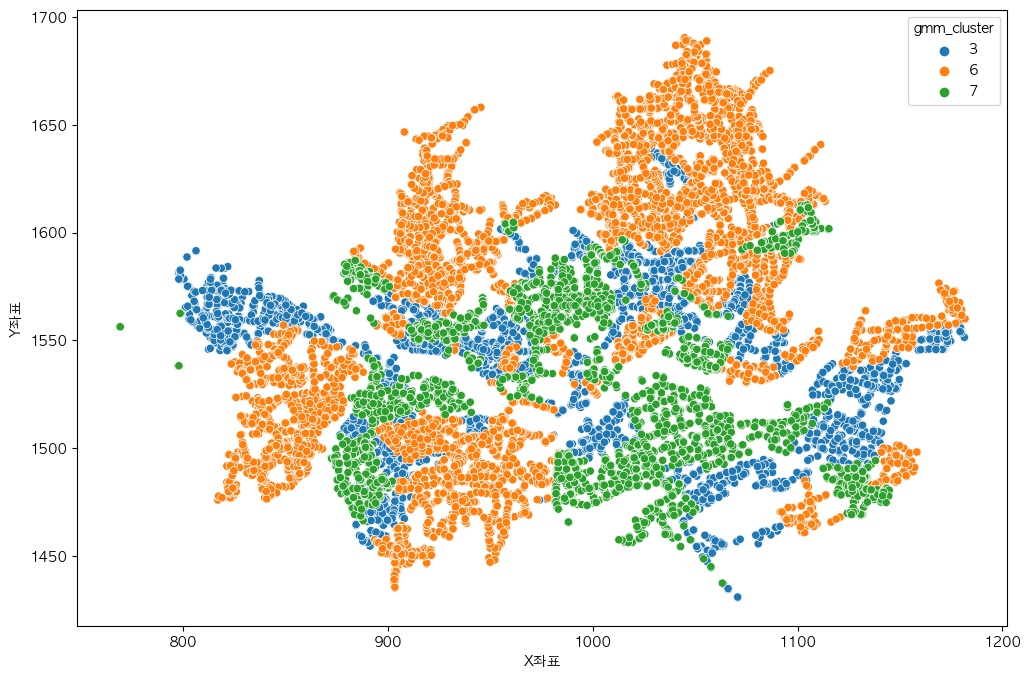

In [152]:
# 좌표를 바탕으로 군집 시각화
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="X좌표",y="Y좌표",hue="gmm_cluster",data=total_minmax_다람쥐, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

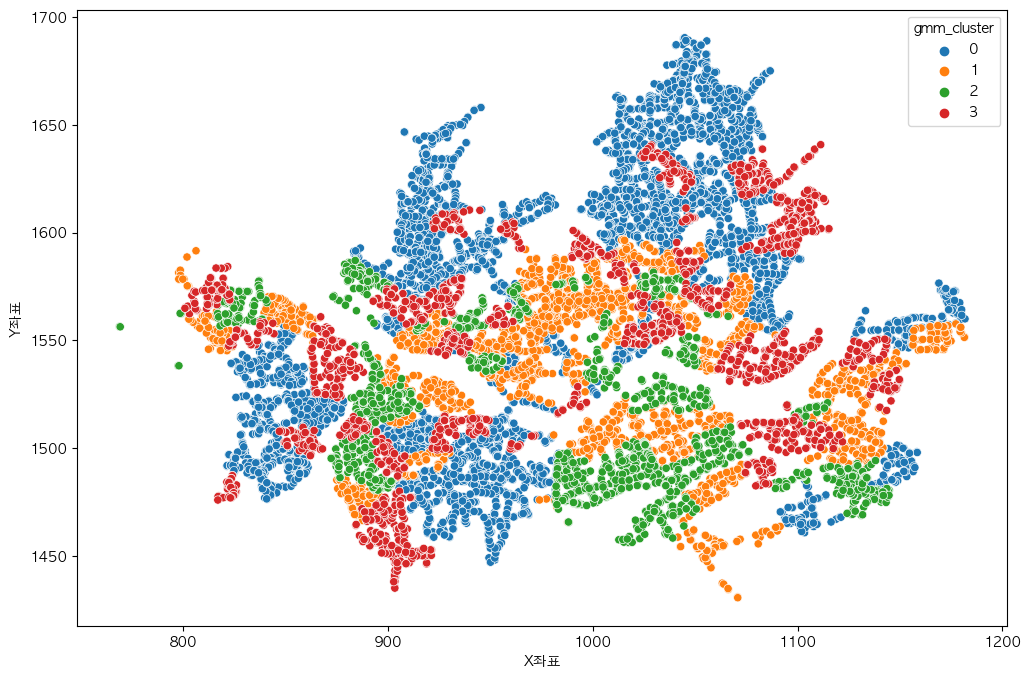

In [153]:
# 좌표를 바탕으로 군집 시각화
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="X좌표",y="Y좌표",hue="gmm_cluster",data=total_standard_다람쥐, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

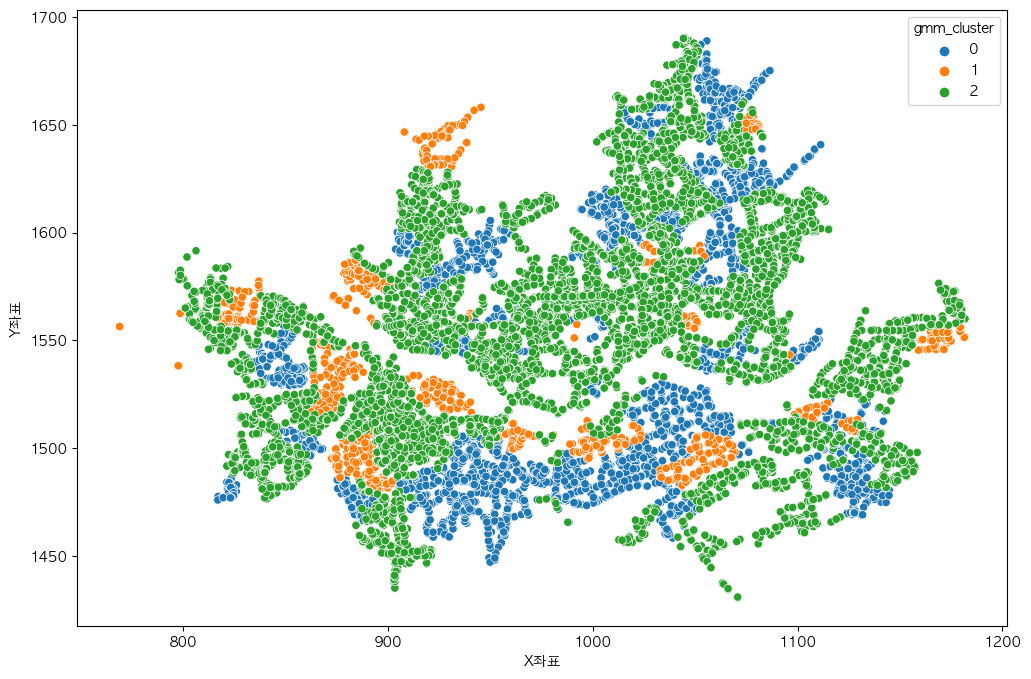

In [165]:
# 좌표를 바탕으로 군집 시각화
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="X좌표",y="Y좌표",hue="gmm_cluster",data=total_robust_다람쥐, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

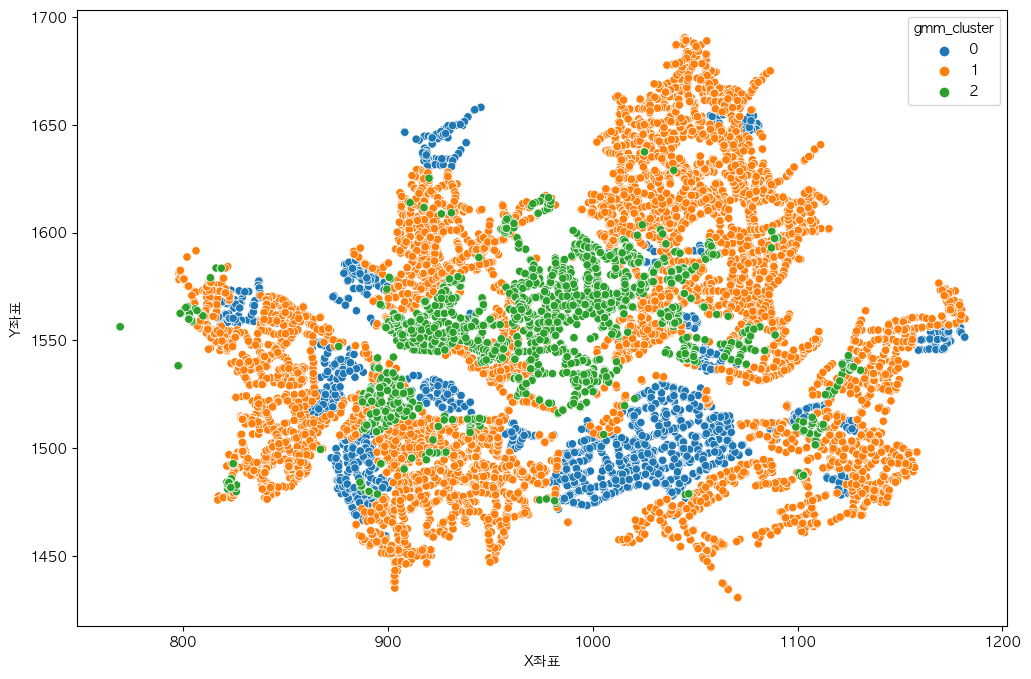

In [221]:
# 좌표를 바탕으로 군집 시각화
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="X좌표",y="Y좌표",hue="gmm_cluster",data=total_robust_on_다람쥐, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

In [200]:
total_robust_다람쥐_class0_corr=total_robust_다람쥐[total_robust_다람쥐["gmm_cluster"]==0].loc[:,['academy_cnt', 'kindergarten_cnt', 'mart_cnt', 'restaurant_cnt',
       'school_cnt', 'university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt',
       'hospital_cnt', 'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt',
       'employee_cnt', 'alone_ratio', 'emp_corp_ratio', 'population_15to64']].corr()

total_robust_다람쥐_class1_corr=total_robust_다람쥐[total_robust_다람쥐["gmm_cluster"]==1].loc[:,['academy_cnt', 'kindergarten_cnt', 'mart_cnt', 'restaurant_cnt',
       'school_cnt', 'university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt',
       'hospital_cnt', 'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt',
       'employee_cnt', 'alone_ratio', 'emp_corp_ratio', 'population_15to64']].corr()

total_robust_다람쥐_class2_corr=total_robust_다람쥐[total_robust_다람쥐["gmm_cluster"]==2].loc[:,['academy_cnt', 'kindergarten_cnt', 'mart_cnt', 'restaurant_cnt',
       'school_cnt', 'university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt',
       'hospital_cnt', 'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt',
       'employee_cnt', 'alone_ratio', 'emp_corp_ratio', 'population_15to64']].corr()

<AxesSubplot:title={'center':'Person Correlation of Features'}>

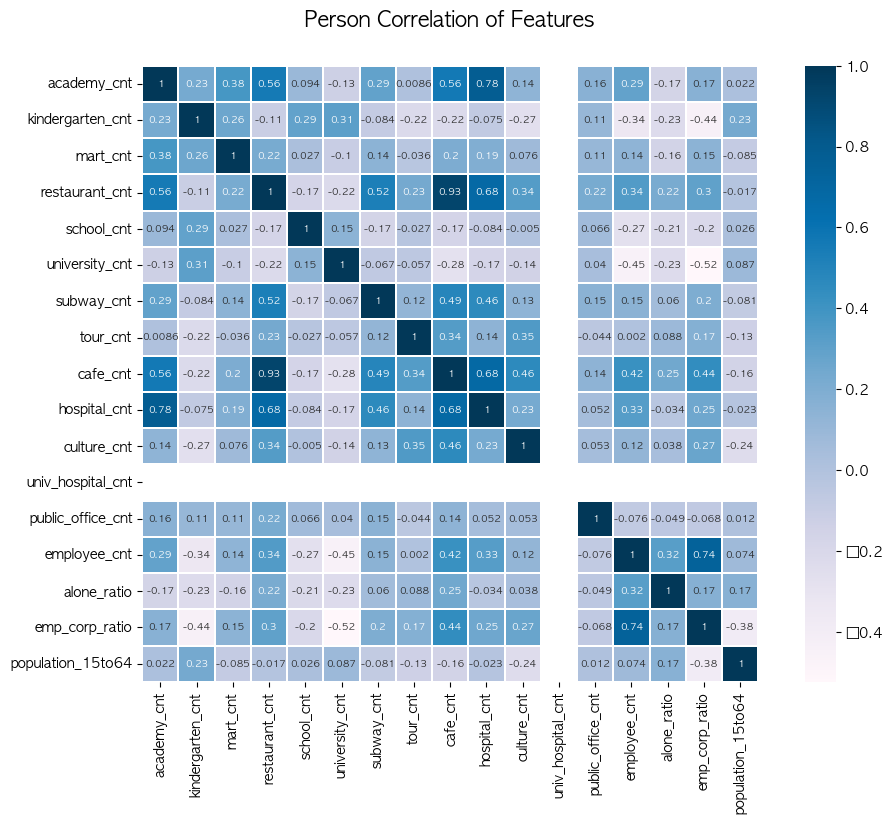

In [208]:
colormap = plt.cm.PuBu
plt.figure(figsize=(12,8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(data = total_robust_다람쥐_class0_corr,linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 7})

In [211]:
total_robust_다람쥐_class0_corr.describe()

academy_cnt  kindergarten_cnt   mart_cnt  restaurant_cnt  school_cnt  \
count    16.000000         16.000000  16.000000       16.000000   16.000000   
mean      0.274148          0.028815   0.156102        0.315738    0.022244   
std       0.319356          0.356449   0.266392        0.358137    0.301432   
min      -0.165162         -0.440151  -0.155554       -0.219207   -0.268156   
25%       0.075917         -0.219941   0.011654        0.159372   -0.168535   
50%       0.198661         -0.079470   0.140565        0.268548   -0.016199   
75%       0.422071          0.238440   0.207941        0.532664    0.072816   
max       1.000000          1.000000   1.000000        1.000000    1.000000   

       university_cnt  subway_cnt   tour_cnt   cafe_cnt  hospital_cnt  \
count       16.000000   16.000000  16.000000  16.000000     16.000000   
mean        -0.048593    0.209087   0.121378   0.319591      0.275845   
std          0.349024    0.295400   0.282617   0.387790      0.352104   
min         -0.523946   -0.165954  -0.216690  -0.276359     -0.167297   
25%         -0.221781    0.028101  -0.037887   0.067840     -0.025599   
50%         -0.116575    0.148760   0.048051   0.379654      0.206424   
75%          0.052083    0.336654   0.188236   0.509747      0.516542   
max          1.000000    1.000000   1.000000   1.000000      1.000000   

       culture_cnt  univ_hospital_cnt  public_office_cnt  employee_cnt  \
count    16.000000                0.0          16.000000     16.000000   
mean      0.159765                NaN           0.117045      0.175205   
std       0.302712                NaN           0.251395      0.374443   
min      -0.265961                NaN          -0.076306     -0.448461   
25%       0.027611                NaN          -0.002298     -0.017593   
50%       0.127343                NaN           0.059314      0.144930   
75%       0.289490                NaN           0.145255      0.334935   
max       1.000000                NaN           1.000000      1.000000   

       alone_ratio  emp_corp_ratio  population_15to64  
count    16.000000       16.000000          16.000000  
mean      0.077243        0.140272           0.031691  
std       0.304428        0.405200           0.298797  
min      -0.229696       -0.523946          -0.384346  
25%      -0.157956       -0.100853          -0.096826  
50%       0.049068        0.170007          -0.002442  
75%       0.179959        0.280705           0.077642  
max       1.000000        1.000000           1.000000

<AxesSubplot:title={'center':'Person Correlation of Features'}>

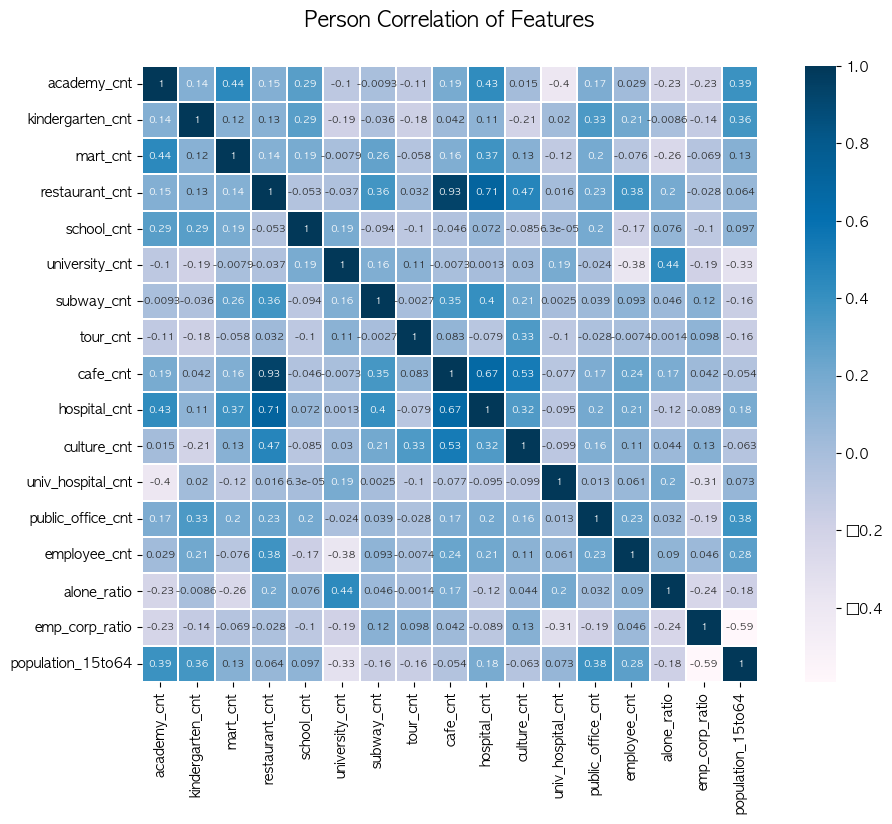

In [209]:
colormap = plt.cm.PuBu
plt.figure(figsize=(12,8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(data = total_robust_다람쥐_class1_corr,linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 7})

<AxesSubplot:title={'center':'Person Correlation of Features'}>

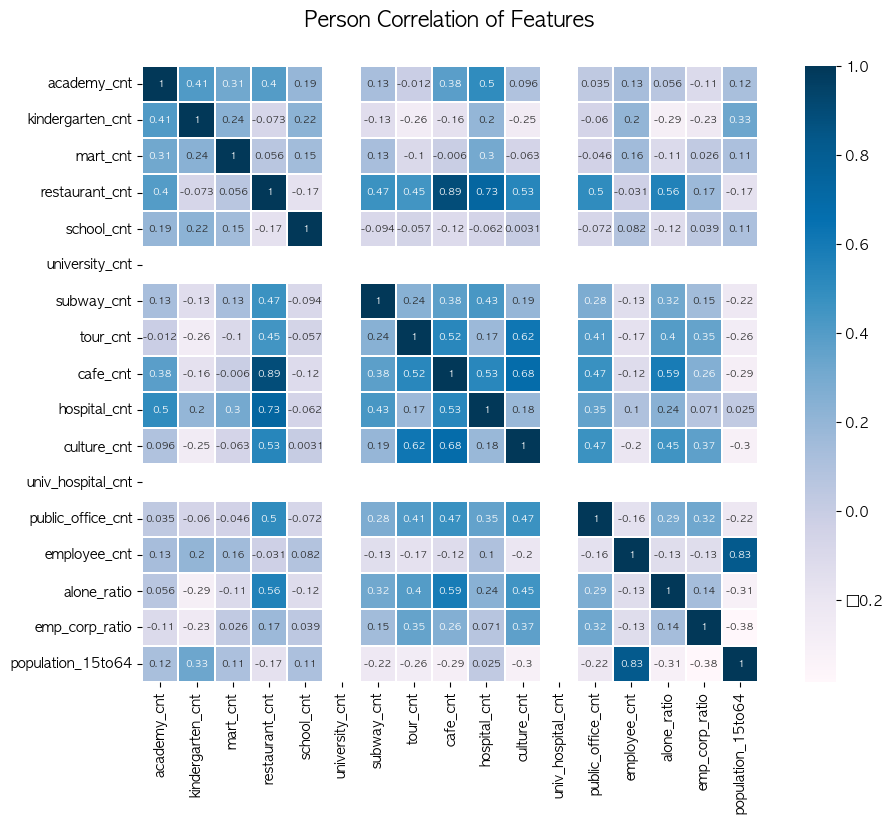

In [210]:
colormap = plt.cm.PuBu
plt.figure(figsize=(12,8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(data = total_robust_다람쥐_class2_corr,linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 7})

In [224]:
total_robust_on_다람쥐_class0_corr=total_robust_on_다람쥐[total_robust_on_다람쥐["gmm_cluster"]==0].loc[:,['academy_cnt', 'kindergarten_cnt', 'mart_cnt', 'restaurant_cnt',
       'school_cnt', 'university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt',
       'hospital_cnt', 'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt',
       'employee_cnt', 'alone_ratio', 'emp_corp_ratio', 'population_15to64','RIDE_SUM_6_10']].corr()

total_robust_on_다람쥐_class1_corr=total_robust_on_다람쥐[total_robust_on_다람쥐["gmm_cluster"]==1].loc[:,['academy_cnt', 'kindergarten_cnt', 'mart_cnt', 'restaurant_cnt',
       'school_cnt', 'university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt',
       'hospital_cnt', 'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt',
       'employee_cnt', 'alone_ratio', 'emp_corp_ratio', 'population_15to64','RIDE_SUM_6_10']].corr()

total_robust_on_다람쥐_class2_corr=total_robust_on_다람쥐[total_robust_on_다람쥐["gmm_cluster"]==2].loc[:,['academy_cnt', 'kindergarten_cnt', 'mart_cnt', 'restaurant_cnt',
       'school_cnt', 'university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt',
       'hospital_cnt', 'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt',
       'employee_cnt', 'alone_ratio', 'emp_corp_ratio', 'population_15to64','RIDE_SUM_6_10']].corr()

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:title={'center':'Person Correlation of Features'}>

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


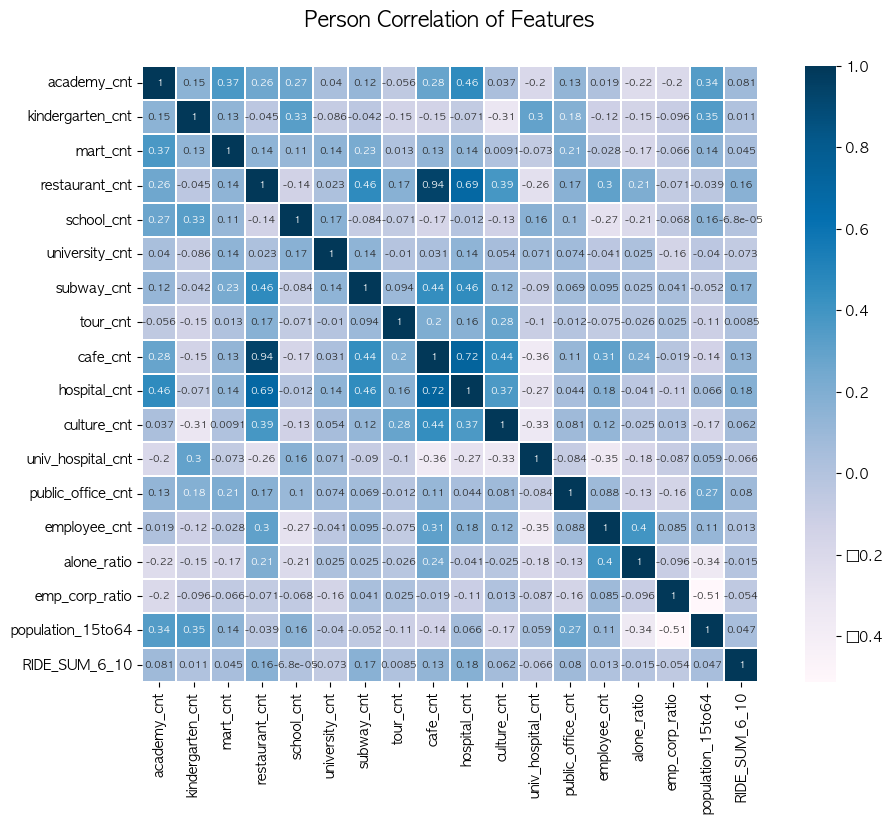

In [225]:
colormap = plt.cm.PuBu
plt.figure(figsize=(12,8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(data = total_robust_on_다람쥐_class0_corr,linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 7})

<AxesSubplot:title={'center':'Person Correlation of Features'}>

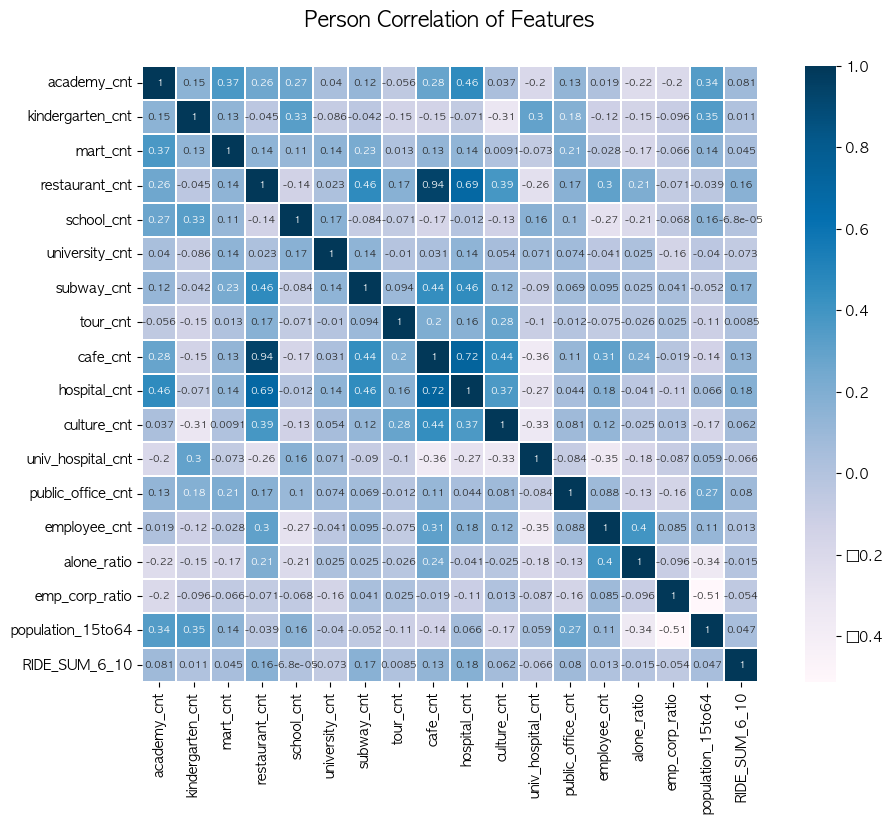

In [227]:
colormap = plt.cm.PuBu
plt.figure(figsize=(12,8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(data = total_robust_on_다람쥐_class0_corr,linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 7})

<AxesSubplot:title={'center':'Person Correlation of Features'}>

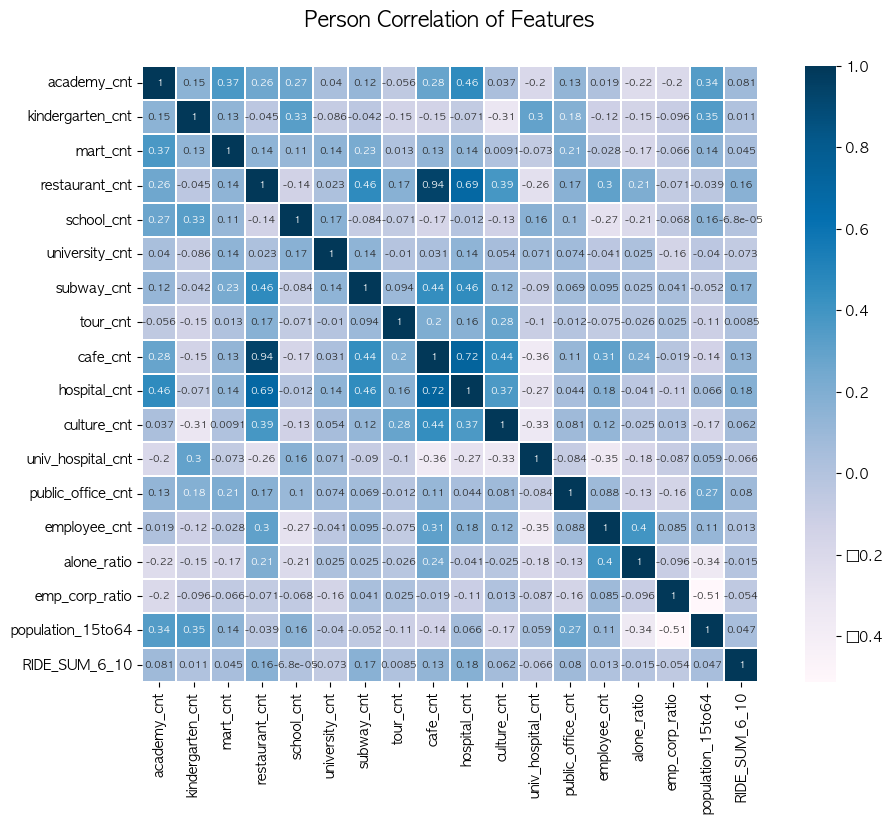

In [226]:
colormap = plt.cm.PuBu
plt.figure(figsize=(12,8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(data = total_robust_on_다람쥐_class0_corr,linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 7})